# ML Overview

**Refer to following notebooks:**
* 00-Lesson
* 03-Lesson
* Regression
* SML Neural Networks

## Statistical Learning Approaches:

#### Datasets:

Train/Validate: $$d_{train/val} = (x_i, y_i)_{i = 1,...,n} \in \mathcal X \times \mathcal Y$$ 
Test: $$d_{test} = (x_{n+i}, y_{n+i})_{i = 1,...}$$ 
Predicted: $$\widehat y_{n+i} = \widehat h^{(d)}(x_{n+i})$$

|                                                        | Regression                         | Classification $(K=2)$                                 | Classification $(K \geq 3)$                  |
| :-                                                     | :-:                                | :-:                                                    | :-:                                          |
| **Prediction Rule** $h: \mathcal X \to \mathcal Y$     | $h(x)$                             | $sign(f(x))$ | $\underset{k=1,...,K}{arg \; max}$$f_k(x)$   |
| **Input Expansion** $\phi: \mathcal X \to \mathcal X'$ | $h_\beta(x) =$$\; \phi(x)^T\beta$ | $f_\beta(x) $$\; = \phi(x)^T\beta$                      | $f_k(x) $$\; = \phi(x)^T\beta_k$             |
| **Least Squares / 0-1 Loss**                           | $\widehat \beta = $ $ (\Phi^T \Phi + $$ \lambda I)^{-1} \Phi^Ty$              | -           | -                                            |

*Note, true data distribution unknown $\therefore$ cannot compute $h^*(x)$ or $R(h)$

#### Task:

Minimise objective function $J: \mathbb{R}^p \to \mathbb{R}_+$  
$$J(\theta) = \sum_{i=1}^{n} J_i(\theta) + J_0(\theta)$$

Find: $$\widehat \theta = \underset{\theta \in \Theta}{arg \; min} \; J(\theta)$$

| Method               | Type            | $J_i(\theta)$                       | $J_0(\theta)$                    |
| :-                   | :-:             | :-:                                 | :-                               |
| ERM                  | Discriminative  | $\frac{1}{n}L(y_i, h_\theta(x_i))$  | $\frac{\lambda}{n}pen(h_\theta)$ |
| Conditional plug-in  | Discriminative  | $-log(f_\theta(y_i|x_i))$           |                                  |
| Generative plug-in   | Generative      | $-log(\pi_\theta(x_i, y_i))$        |                                  |

#### Loss Functions:

| Class/Reg      | Loss Function | $L(y,h(x))$                        | $h^*(x)$                                                          | Notes                                        |
| :-             | :-            | :-:                                | :-                                                                | :-                                           |
| **Binary**     | 0-1           | $\mathbb 1_{sign(yf(x)) = -1}$     | $\underset{k  \in \{0,1\}}{arg \; max} $$ \; \mathbb P (Y=k|X=x)$ | NP hard                                      |
| **Binary**     | Hinge         | $max(0,1-yf(x))$                   |                                                                   | Used for SVM                                 |
| **Binary**     | Exponential   | $e^{-yf(x)}$                       |                                                                   | Used in Boosting Algorithms, e.g. Adaboost   |
| **Binary**     | Logistic      | $\frac{log(1+e^{-yf(x)})}{log(2)}$ |                                                                   | Used in Logistic Regression                  |
| **Binary**     | Perceptron    | $1 + max(0,-yf(x))$                |                                                                   | Used in Neural Networks                      |
| **Regression** | Squared       | $(y-f(x))^2$                       | $\mathbb E [Y|X=x]$                                               | Closed-form solution                         |
| **Regression** | Absolute      | $|y-f(x)|$                         | $med [Y|X=x]$                                                     | Used in Least Absolute Deviations Regression |



#### Choosing the right estimator (Scikit Learn):

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

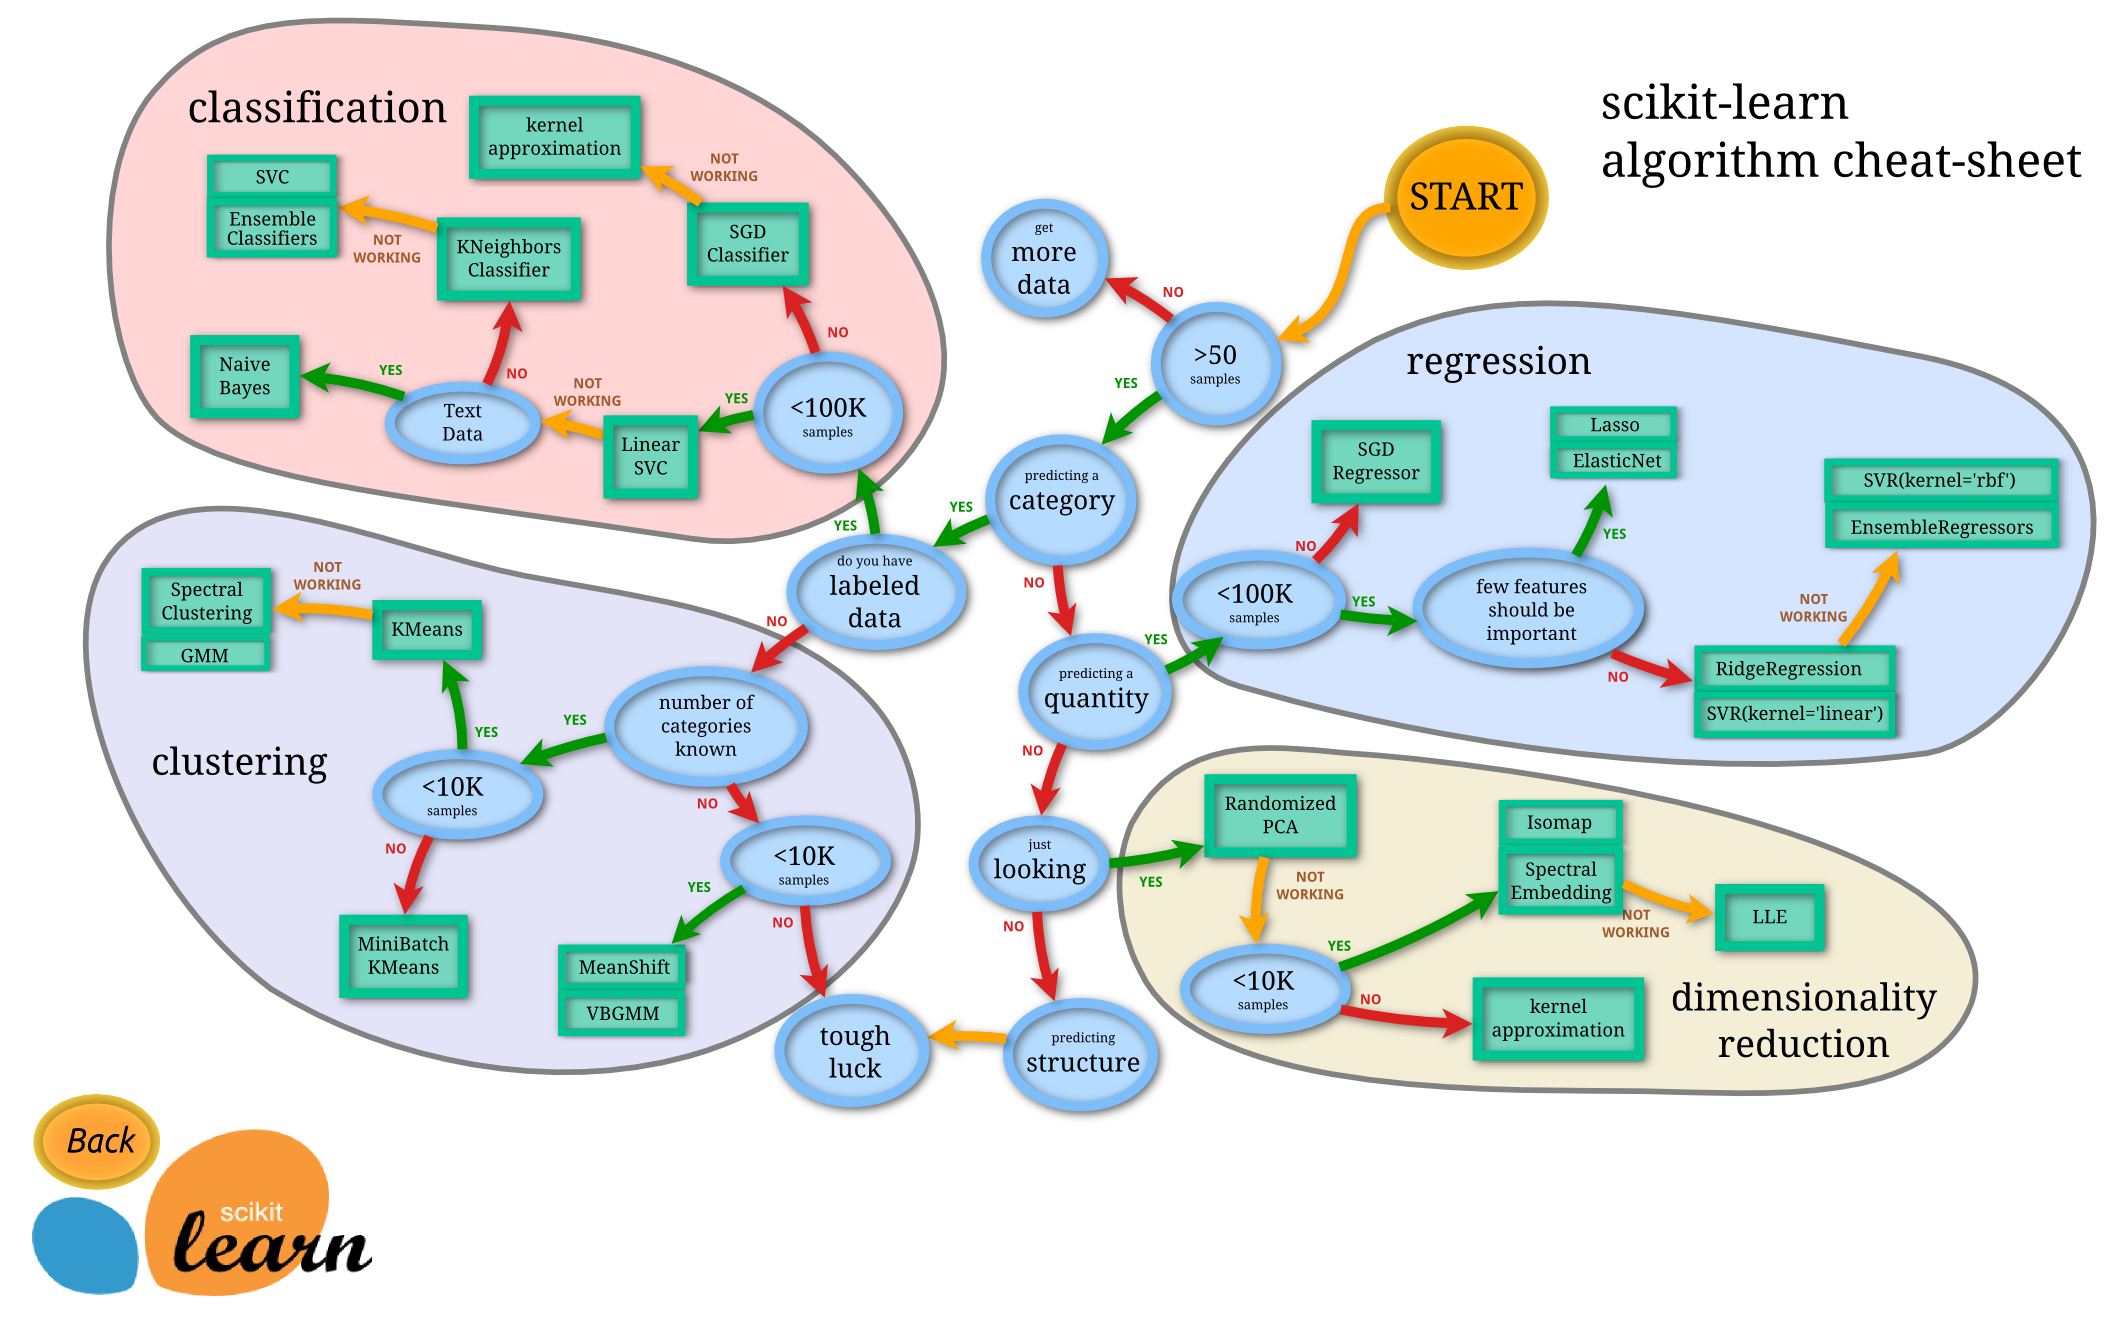

#### Futher Notes:
- https://towardsdatascience.com/which-machine-learning-model-to-use-db5fdf37f3dd

### All Models:

| Classification       | Regression      | Clustering                          | Dimensionality Reduction         |
| :-                   | :-              | :-                                  | :-                               |
| ERM                  | Discriminative  | t                                   | t                                |
| Conditional plug-in  | Discriminative  | t                                   | t                                |
| Generative plug-in   | Generative      | t                                   | t                                |

# Set-Up

In [2]:
# Import general libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

%matplotlib inline

In [3]:
# Default plotting parameters
plt.rcParams["figure.dpi"] = 100
sns.set()

## Datasets

### Iris
Use: PCA, LDA, Logistic Regression, KNN

In [189]:
iris_np = datasets.load_iris()
X = iris_np.data
y = iris_np.target  # 0's, 1's, 2's
names = iris_np.target_names  # corresponding names

y_names = pd.Series(y).replace(
    {0: names[0], 1: names[1], 2: names[2]}  # y replaced with names
)


# df = pd.DataFrame(data = np.c_[data['data'], data['target']],
#                     columns= data['feature_names'] + ['target'])

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']

iris_pd = pd.DataFrame(
    data=np.c_[iris_np["data"], iris_np["target"]],
    columns=iris_np["feature_names"] + ["target"],  # column names
)

iris_pd = iris_pd.replace({"target": {0: names[0], 1: names[1], 2: names[2]}})

In [190]:
print(iris_pd.shape)
iris_pd.head()

(150, 5)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [191]:
# sns.pairplot(data=iris_pd, hue="target")

In [194]:
iris_pd.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

### Diabetes
Use: Regression Trees, Random Forest

In [197]:
# Load dataset
diabetes_np = datasets.load_diabetes()
X = diabetes_np.data
y = diabetes_np.target

# Convert to pd.DataFrame
diabetes_pd = pd.DataFrame(
    data=np.c_[diabetes_np["data"], diabetes_np["target"]],
    columns=diabetes_np["feature_names"] + ["target"],  # column names
)

In [4]:
print(diabetes_pd.shape)
diabetes_pd.head()

(442, 11)


age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

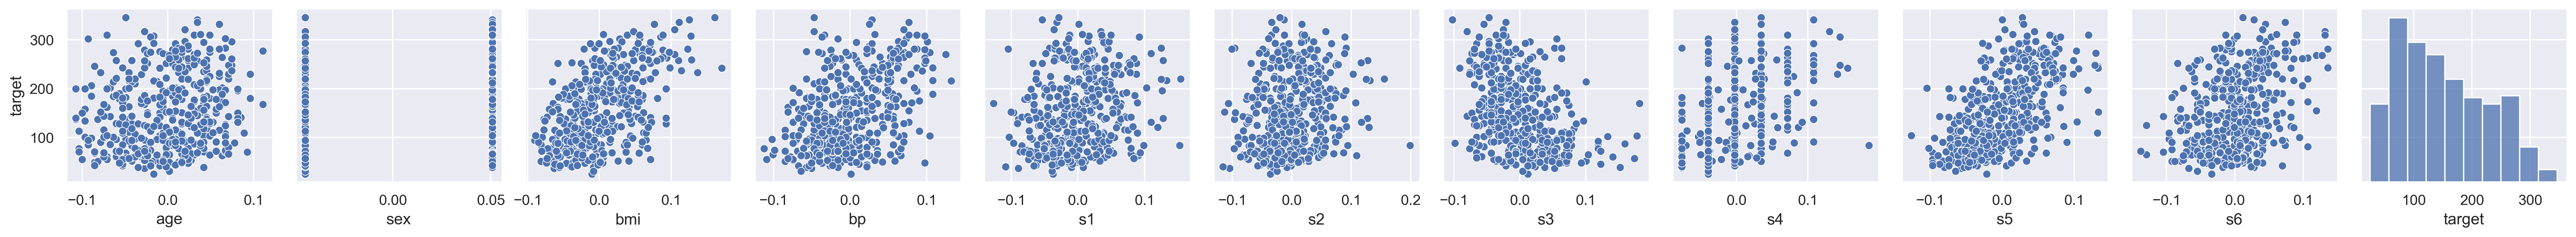

In [10]:
sns.pairplot(data=diabetes_pd, y_vars="target");

#### Example Formatting:

In [225]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [226]:
features = ['age', 'sex', 'bmi', 'bp']
X = diabetes_pd[features]
y = diabetes_pd.target

In [227]:
X.describe()

age           sex           bmi            bp
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01

In [228]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X, y)

print("Making predictions for the following 5 people:")
print(X.head())
print("The predictions are")
print(reg.predict(X.head()))

Making predictions for the following 5 people:
        age       sex       bmi        bp
0  0.038076  0.050680  0.061696  0.021872
1 -0.001882 -0.044642 -0.051474 -0.026328
2  0.085299  0.050680  0.044451 -0.005670
3 -0.089063 -0.044642 -0.011595 -0.036656
4  0.005383 -0.044642 -0.036385  0.021872
The predictions are
[151.  75. 141. 206. 135.]


In [230]:
# Split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 53
Model 2 MAE: 53
Model 3 MAE: 53
Model 4 MAE: 51
Model 5 MAE: 52


### Titanic
Use: Naive Bayes, Random Forest?

In [93]:
# Load dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_pd = pd.read_csv(url)

# Adjust dataset
titanic_pd = titanic_pd[["Survived", "Pclass", "Sex", "Age"]]
titanic_pd["Sex"] = [1 if sex == "male" else 0 for sex in titanic_pd["Sex"]]
# titanic_np[:,2] = np.array([1 if sex == "male" else 0 for sex in titanic_np[:,2]]) # Convert male/female to 1/0

# Numpy copy
titanic_np = titanic_pd.to_numpy()

In [94]:
print(titanic_pd.shape)
titanic_pd.head()

(887, 4)


Survived  Pclass  Sex   Age
0         0       3    1  22.0
1         1       1    0  38.0
2         1       3    0  26.0
3         1       1    0  35.0
4         0       3    1  35.0

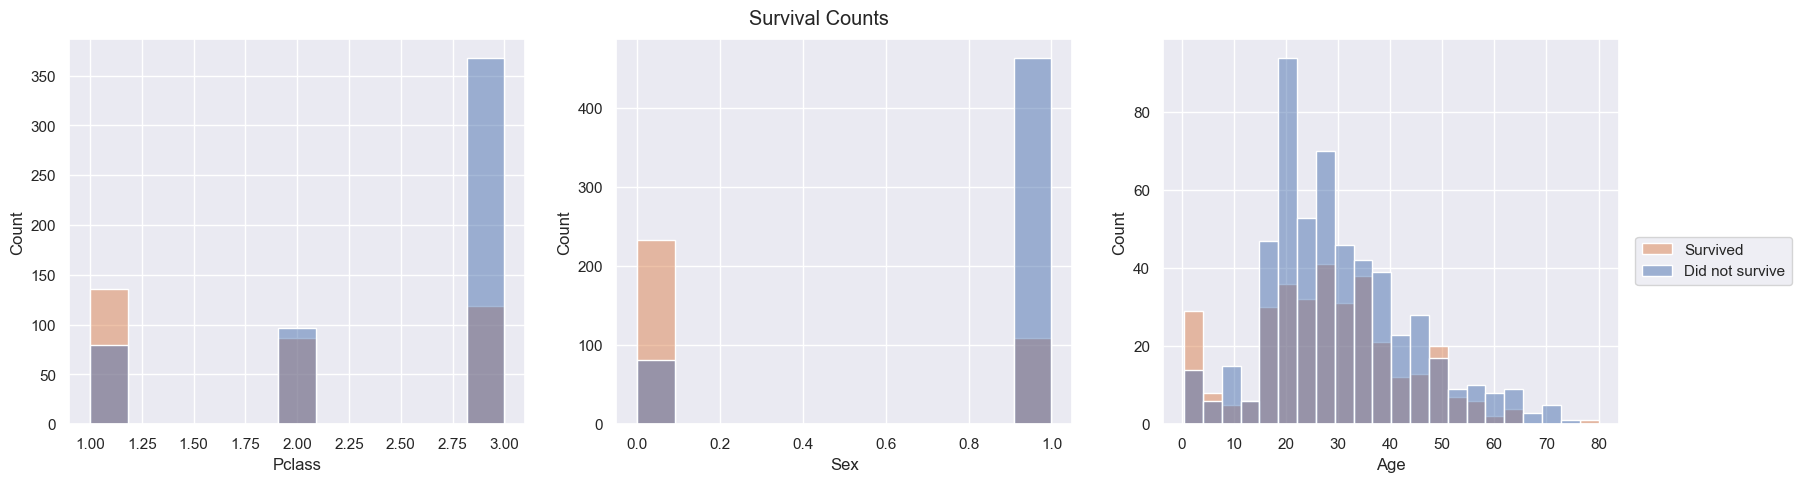

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i in range(len(titanic_pd.columns) - 1):
    plt.subplot(1, 3, i + 1)
    sns.histplot(
        data=titanic_pd, x=titanic_pd.columns[i + 1], hue="Survived", legend=[]
    )
    # sns.histplot(data = titanic_pd, x = "Survived", y = titanic_pd.columns[i+1])

fig.legend(["Survived", "Did not survive"], bbox_to_anchor=(0.99, 0.5))
fig.suptitle("Survival Counts", y=0.94);

### Artificial 1 (classification)

In [4]:
# Create data MOONS
n = 100
X, y = datasets.make_moons(n_samples=n, noise=0.4, random_state=0)

moons = (X, y)

In [5]:
# Create data CIRCLES
n = 100
X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

circles = (X, y)

In [6]:
# Create data LINES
X, y = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

lines = (X, y)

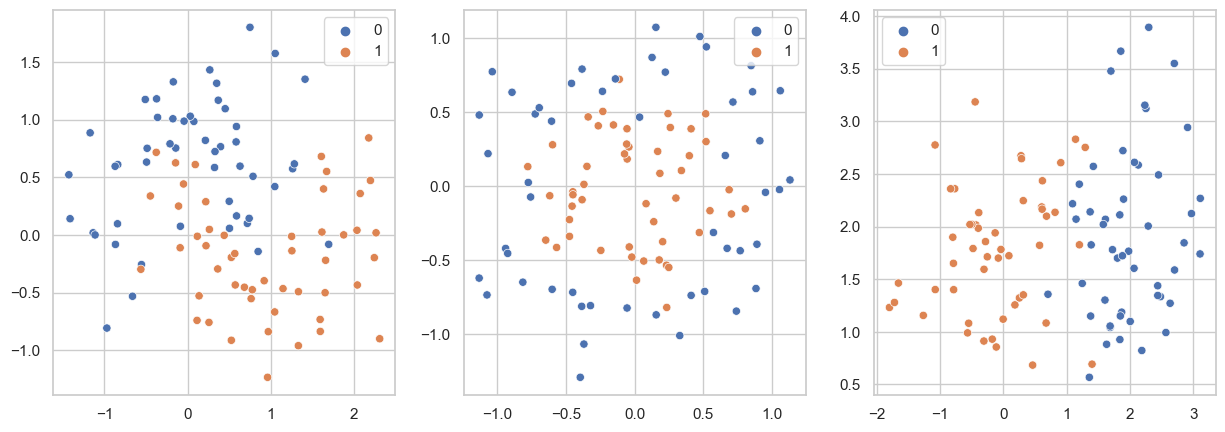

In [7]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=moons[0][:, 0], y=moons[0][:, 1], hue=moons[1])

plt.subplot(1, 3, 2)
sns.scatterplot(x=circles[0][:, 0], y=circles[0][:, 1], hue=circles[1])

plt.subplot(1, 3, 3)
sns.scatterplot(x=lines[0][:, 0], y=lines[0][:, 1], hue=lines[1]);

### Artificial 2 (regression)

**Sinusoid**

$Y = sin(2 \pi X) + \epsilon$  
$X \sim U(0,1)$  
$\epsilon \sim N(0,\sigma^{2})$

**Bayes prediction rule:**  
$h^{*}(x) = \mathbb{E}[Y|X=x] = sin(2 \pi X)$

**Risk for prediction rule:**  
$R(h) = \mathbb{E}[(Y-h(X))^{2}] = \mathbb{E}[(sin(2 \pi X) + \epsilon - h(X))^{2}] = \sigma^{2} +\int_{0}^{1}(sin(2 \pi X) - h(x))^{2}dx$

**Bayes risk:**  
$R(h^{*}) = \mathbb{E}[(sin(2 \pi X) + \epsilon - (sin(2 \pi X)] = \sigma^{2}$

**Rules & Risks:**  
A) $h^{*}$: Bayes prediction rule: $sin(2 \pi X)$  
B) $h^{*}_{\mathcal{H}}$: Best prediction rule within class $\mathcal{H}$: $\sum_{j=0}^{M} \beta_{j}x^{j}$ (use all points)

C) $\widehat h^{(d)}$: Learned prediction rule: $\sum_{j=0}^{M} \beta_{j}x^{j}$ (use given points)  
D) $\widehat h^{(d)}_{\mathcal{H}}$: Learned prediction rule  within class $\mathcal{H}$

E) $R(\widehat h^{(d)})$: Population/True/Generalisation Risk of learned prediction rule: $\sigma^{2} +\int_{0}^{1}(sin(2 \pi X) - \widehat h^{(d)}(x))^{2}dx$  
F) $\widehat R_n(\widehat h^{(d)})$: Empirical Risk of learned prediciton rule: $\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \widehat h^{(d)}(x))^{2} $  
G) $R(h^*)$: Population risk of optimal prediction rule (Bayes Risk)  
H) $R(h^*_{\mathcal{H}})$: Risk of best prediction rule within class $\mathcal{H}$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ I) $\;\;\;\;\;\;\;$ =$\;\;\;\;\;\;\;\;\;\;\;\;\;$ J) $\;\;\;\;\;\;\;\;\;$ + $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ K)  
$\;\;\;\;\; R(\widehat h^{(d)})$ - $R(h^*) \;\;$ = $\;\; R(\widehat h^{(d)})$ - $R(h^*_{\mathcal{H}}) \;\;$ + $\;\; R(h^*_{\mathcal{H}})$ - $R(h^*)$  
**$\;\;\;\;\;\;\;\;\; $Excess risk $\;\;\;$ =$\;\;$ estimation error$\;$ + $\;$ approximation error**

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ L) $\;\;\;\;\;\;\;\;\;$ =$\;\;\;\;\;\;\;\;\;\;$ M) $\;\;\;\;\;\;\;\;\;$ + $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ N)  
$\mathbb{E}_{D}[R(\widehat h^{(d)})$ - $R(h^*)] \;\;$ = $\;\; \mathbb{E}_{X}[v_{\mathcal{H},n}(X)] \;\;$ + $\;\; \mathbb{E}_{X}[b_{\mathcal{H},n}(X)^{2}]$  
**$\;\;\;\;\;$Av. Excess risk $\;\;\;$ =$\;\;$ variance term$\;$ + $\;\;\;\;$ bias term**

In [97]:
# Bayes prediction rule
def h_star(x):
    return np.sin(2 * np.pi * x)


sd = 0.5  # standard deviation of the additive noise


# Generate synthetic dataset
np.random.seed(11)

n = 50
X = np.random.uniform(size=(n))
y = h_star(X) + np.random.normal(loc=0, scale=sd, size=(n))  # .shape = (10,)

sinusoid = (X, y)

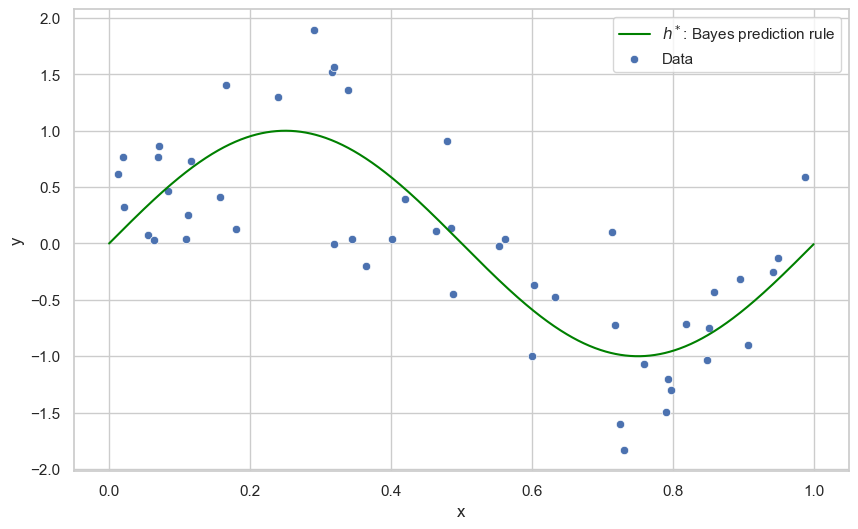

In [98]:
## Plot dataset and Bayes prediction rule

# Grid of values from 0 to 1
X_grid = np.arange(0, 1, 0.001)  # 1D array, .shape = (1000,)
y_grid = h_star(X_grid)

# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

p1 = sns.lineplot(ax=ax, x=X_grid, y=y_grid, color="green")
p2 = sns.scatterplot(ax=ax, x=X, y=y)

plt.xlabel("x")
plt.ylabel("y")
plt.legend([r"$h^*$: Bayes prediction rule", "Data"]);

## Functions

In [169]:
def create_mesh(X_axis=(0, 10), Y_axis=(0, 10), delta=0.1):

    X1 = np.arange(X_axis[0], X_axis[1], delta)
    Y1 = np.arange(Y_axis[0], Y_axis[1], delta)

    global X_mesh, Y_mesh
    X_mesh, Y_mesh = np.meshgrid(X1, Y1)


def plot_decision_contours(no_colors=1):
    # Plot the filled and boundary contours
    plt.contourf(
        X_mesh, Y_mesh, Z, no_colors - 1, alpha=0.2, colors=sns.color_palette()
    )
    plt.contour(X_mesh, Y_mesh, Z, 1, linewidths=1.0, alpha=1, colors="white")


def decision_predict_mesh(clf):
    # Computing the predicted class function for each value on the grid
    zz = np.array(
        [
            clf.predict(np.array([[xx, yy]]))
            for xx, yy in zip(np.ravel(X_mesh), np.ravel(Y_mesh))
        ]
    )  # flatten X into 1D

    # Reshaping the predicted class into the meshgrid shape
    global Z
    Z = zz.reshape(X_mesh.shape)


def plot(clf, no_classes):
    delta_X1 = (X[:, 0].max() - X[:, 0].min()) / 20
    delta_X2 = (X[:, 1].max() - X[:, 1].min()) / 20

    create_mesh(
        (X[:, 0].min() - delta_X1, X[:, 0].max() + delta_X1),
        (X[:, 1].min() - delta_X2, X[:, 1].max() + delta_X2),
        delta=0.01,
    )
    decision_predict_mesh(clf)
    plot_decision_contours(no_classes)
    col = sns.color_palette()  # use sns standard color palette
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="deep")
    
    
def plot2(X = X, y = y):
    
    X_grid = np.arange(0, 1, 0.001)  # 1D array, .shape = (1000,)
    y_grid = h_star(X_grid)    
    
    X, y = X.reshape(-1,), y.reshape(-1,)

    fig, ax = plt.subplots()
    sns.lineplot(ax=ax, x=X_grid, y=y_grid, color="green")
    sns.scatterplot(x=X, y=y, ax=ax)
    

    x0 = np.arange(X.min(), X.max(), 0.01).reshape(-1,)
    yhat = reg.predict(x0.reshape(-1, 1)).reshape(-1,)


    sns.lineplot(x=x0, y=yhat, color="red");

# Classification

| Model                   |Type            | Speed | Dataset size    | Assumptions         | Notes
| :-                      | :-             | :-    | :-              | :-                  | :-     
| LDA/QDA                 | Generative     |       |                 |                     | Assume gaussian distribution of classes
| Naive Bayes             | Generative     | Fast  | <100k           |                     |
| Logistic Regression     | Discriminative | Fast  |                 |                     |
| KNN                     | Discriminative | Fast  | <100k           |                     |
| Decision Trees          | Discriminative | Fast  |                 |                     | Interpretable, unstable, poor predictive performance
| Gradient Boosting Trees | Discriminative | Slow  |                 |                     | Similar to Random Forest, but easier to overfit
| Random Forest           | Discriminative | Slow  |                 |                     | Bagging **reduces variance** at the cost of **small increase in bias**
| Neural Network          | Discriminative | Fast  |                 |                     | Needs a lot of data points
| Linear SVM              | Discriminative | Fast  | <100k           |                     | 
| RBF SVM                 | Discriminative | Slow  | <100k           |                     |

## LDA/QDA

In [449]:
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

sns.set_theme()

In [456]:
# iris_pd.head()

In [452]:
X = moons[0]
y = moons[1]

# X = iris_np.data[:, [0, 1]]
# y = iris_np.target

In [453]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

QuadraticDiscriminantAnalysis()

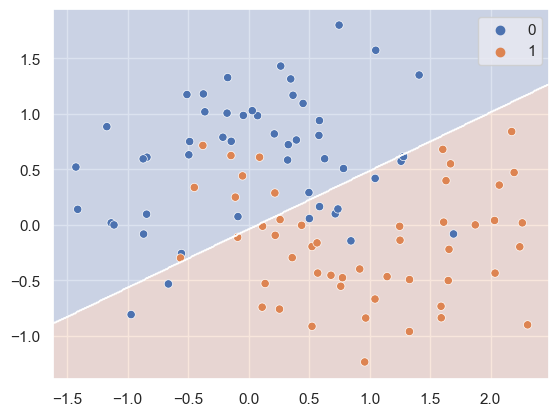

In [454]:
plot(lda, 2)

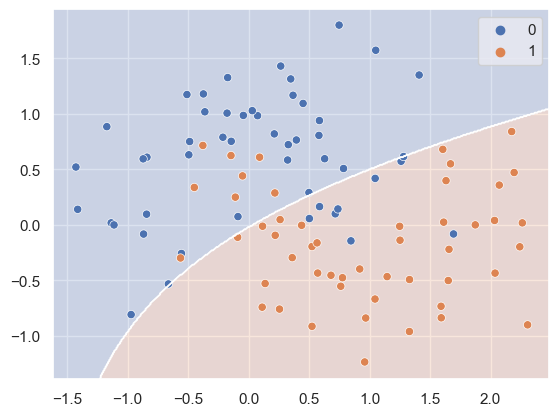

In [455]:
plot(qda, 2)

## Naive Bayes

## Logistic Regression

See SML 7: Logistic reg with interaction term at bottom of notebook

## KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [406]:
X = moons[0]
y = moons[1]

# X = iris_np.data[:, [0, 1]]
# y = iris_np.target

In [328]:
knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

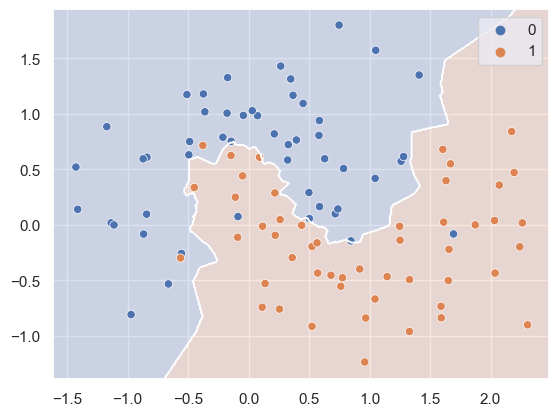

In [329]:
plot(knn, 2)

## Decision Trees

Partition $\mathcal X$ into $R$ disjoint sets $(\mathcal R_1,...,\mathcal R_R)$

$$h(x) = \sum_{j=1}^{R} \beta_j \mathbb 1_{x \in \mathcal R_j}$$

**Classification (0-1 loss):**  
$$\widehat \beta_j = \underset{k = 1,...,K}{arg \; max} \sum_{i=1}^{n} \mathbb 1_{y_i=k} \mathbb 1_{x_i \in \mathcal R_j}$$

**Growth Heuristics for Classification Trees (K classes):**

**Impurity measures $i(\eta_k) $:**  
Missclassification error: $\; 1 - max_k \eta_k$  
Gini impurity: $ \sum_{k=1}^K \eta_k (1-\eta_k)$  
Entropy: $ -\sum_{k=1}^K \eta_k log \eta_k$

**STEPS:**
1. Split $\mathcal R = \mathcal R_l \cup \mathcal R_r$
2. Calculate $q_l = \frac{\{\#i|x_i \in \mathcal R_l\}}{\{\#i|x_i \in \mathcal R\}}$, $q_r = 1-q_l$
3. For each $k \in K$, calculate $\eta_k$, $\eta_{k,l}$, $\eta_{k,r}$, and $i(\eta_k)$, $i(\eta_{k,l})$, $i(\eta_{k,r})$
4. Choose $\underset{k, l, r}{arg \; max} \; ( i(\eta_k) - q_l i(\eta_{k,l}) - q_r i(\eta_{k,r}) )$ (change in impurity measure)

**Growth Huristics for Classification**

In [18]:
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [74]:
X = lines[0]
y = lines[1]

# X = iris_np.data[:, [0, 1]]
# y = iris_np.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

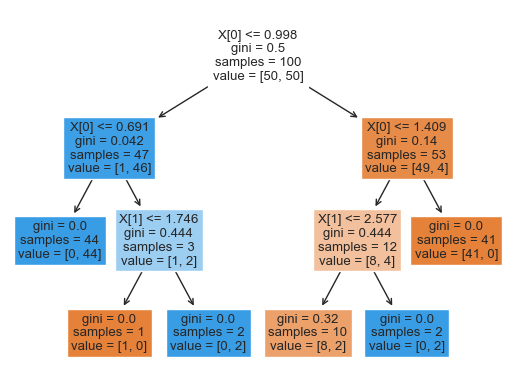

In [504]:
tree = DecisionTreeClassifier(max_depth=3)  # max_leaf_nodes=6)
tree.fit(X, y)

plot_tree(tree, filled=True);

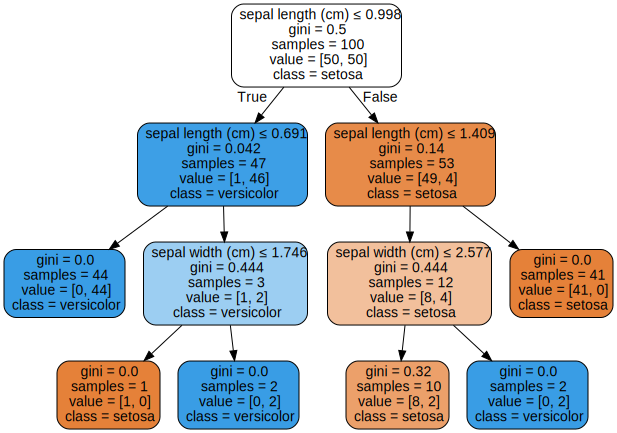

In [505]:
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=iris_np.feature_names[0:2],
    class_names=iris_np.target_names,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

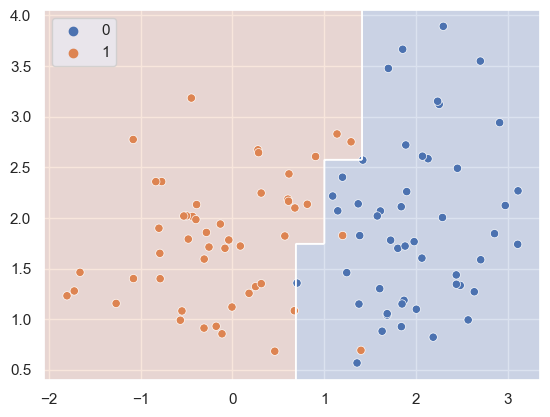

In [506]:
plot(tree, 2)

## Bagging & Random Forest (Ensamble Methods: Averaging)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.model_selection import cross_val_score

### Bagging (**B**ootstrap **Agg**regation) Algorithm:

**Bagging:**  
For $b = 1, ..., B$:
1. Draw indices $(k_{b,1}, ..., k_{b,n})$ from $\{1,...,n\}$ with replacement
2. Form $\widehat h^{(d_b)}(x)$ on $d_b = ((x_{k_{b,1}}, y_{k_{b,1}}),...,(x_{k_{b,n}}, y_{k_{b,n}}))$ **[dependent]**  


Bagged estimate: $$\widehat h_{Bag}^{(d_1, ..., d_B)}(x) = \frac{1}{B} \sum_{b=1}^{B} \widehat h^{(d_b)}(x)$$  


**Aggregation:**  
$\;\;\;\;\;$ Ideal: $\widehat h^{(d_b)}(x)$ on $D_b = ((x_{k_{b,1}}, Y_{k_{b,1}}),...,(X_{k_{b,n}}, Y_{k_{b,n}}))$ **[independent]**

Aggregated estimate: $$\widehat h_{ag}^{(D_1, ..., D_B)}(x) = \frac{1}{B} \sum_{b=1}^{B} \widehat h^{(D_b)}(x)$$

$bias(\widehat h_{ag}^{(D_1, ..., D_B)}(x)) = bias(\widehat h^{(D_b)}(x))$

$var(\widehat h_{ag}^{(D_1, ..., D_B)}(x)) = \frac{1}{B} var(\widehat h^{(D_b)}(x))$

### Out-of-bag Test Error Estimation:

For $i = 1,...,n$

**Out-of-bag sample** (need reasonably large)**:** $$\tilde{B}_i = \{b:x_i \; is \; not \; in \; training \; set \} \subseteq \{1,...,B\}$$ 
**Out-of-bag estimate at $x_i$:** $$\widehat h_{oob}(x_i) = \frac{1}{|\tilde{B}_i|} \sum_{b \in \tilde{B}_i} \widehat h^{(d_b)}(x_i)$$
**Out-of-bag risk:** $$\widehat R_{oob} = \frac{1}{n} \sum_{i=1}^{n} L(y_i, \widehat h_{oob}(x_i))$$

### Bagging:

* Bagging reduces variance and prevents overfitting
* Often improves accuracy in practice.
* Bagged trees cannot be displayed as nicely as single trees and some of the interpretability of trees is lost

### Random Forest:

For each split point, the search is not over all $p$ variables but just over somr $p_{max} \leq p$ randomly chosed ones (where e.g. $p_{max} = \lfloor \sqrt p \rfloor$).
* Can fully grow trees
* Tend to produce better predictions than bagging
* Results often not sensitive to the tuning parameter $p_{max}$
* Particularly good for small/medium size datasets  
$\;$
* Typically worse than deep learning on huge datasets
* Limited interpretability

### Extremely Randomized Trees:

For each split point, sample $p_{max}$ variables each with a random value to split on, and pick the best one.
* Often works even when $p_{max} = 1$.


In [77]:
clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), n_estimators=15, random_state=0, oob_score=True,
)

clf.fit(X, y)

clf.oob_score_

0.95

CPU times: total: 3min 19s
Wall time: 3min 19s


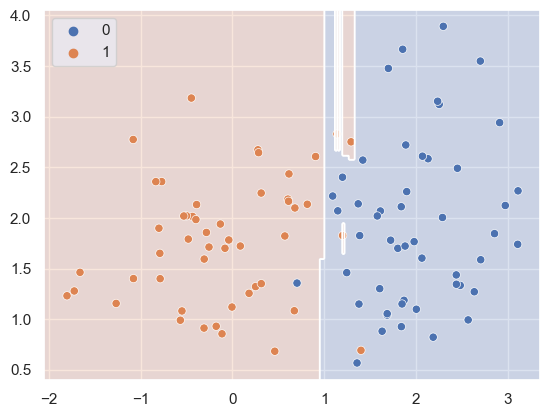

In [514]:
%%time
plot(clf, 2)

In [22]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8800000000000001

In [23]:
clf = RandomForestClassifier(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.93

In [24]:
clf = ExtraTreesClassifier(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9200000000000002

## AdaBoost & Gradient Tree Boosting (Ensamble Methods: Boosting)

* Boosting is a bias-reduction technique, as opposed to bagging.
* Resistant to overfitting (the testing error typically stays flat for a large number of iterations - but will eventually go up).
* Can be understood as functional gradient descent, leading to a generic framework called gradient boosting

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

**Set-up**
* Recall, **binary classificaton**: $h(x) = sign(f(x))$  
* For **boosting prediction rule**: $f(x) = \sum_{t=1}^T \beta_t h_t (x)$  
$\;$
* **AdaBoost:** Use **surrogate exponential loss**: $\tilde{L}(y,h(x)) = \psi(yf(x)) = e^{-yf(x)}$
* **Logit-Boost:** Use **surrogate logistic loss**: $\tilde{L}(y,h(x)) = \psi(yf(x)) = log(1+e^{-yf(x)})$   
$\;$
* **ERM** (AdaBoost): $\hat R_n = \frac{1}{n} \sum_{i=1}^n e^{-y_i(\sum_{t=1}^T \beta_t h_t(x_i))}$
* **ERM** (Logit-Boost): $\hat R_n = \frac{1}{n} \sum_{i=1}^n log(1+e^{-y_i(\sum_{t=1}^T \beta_t h_t(x_i))})$  
$\;$
* **ERM** (General): $\hat R_n = \frac{1}{n} \sum_{i=1}^n \psi(y_i(\sum_{t=1}^T \beta_t h_t(x_i)))$ 

Forward stagewise additive modelling for AdaBoost ERM $\implies$ **AdaBoost Algorithm** (below).

### Boosting Algorithm (General)

**Dataset**  
$d = \{(x_i, y_i)\}$

**Initialise**  
$\widehat{f_0}(x) = 0$

**Steps**  
For $t = 1, ..., T$, add a new weighted weak learner into the model:
* $(\widehat \beta_t, \widehat h_t) = \underset{\beta_t \in \mathbb R, h_t \in \mathcal H}{arg \; min} \; \frac{1}{n} \sum_{i=1}^n \psi (y_i(\widehat f_{t-1} + \beta_t h_t(x_i))$ 

* $\widehat f_{t} = \widehat f_{t-1} + \beta_t h_t(x_i)$

Output $\widehat h(x) = sign(\widehat f_T(x)) = sign(\sum_{t=1}^T \widehat \beta_t \widehat h_t(x))$

If minimisation not tractable, perform a gradient descent step instead.

### Adaboost Algorithm

(Below discussion for classification. Can also be used for regression.)

**Dataset**  
$d = \{(x_i, y_i)\}$, where $y_i \in \{+1, -1\}$  

**Initialise**  
For $i = 1, ..., n$,  
Initialise weights $\bar{w}_{i,1} = \frac{1}{n}$

**Steps**  
For $t = 1, ..., T$
1. Train: $\widehat h_t = \underset{h_t \in \mathcal H}{arg \; min} R_{\bar{w}_t} (h_t)$ where $R_{\bar{w}_t} (h_t) = \sum_{i=1}^n \bar{w}_{i,t} \mathbb 1_{y_i \neq h_t(x_i)}$

2. Compute $\widehat \beta_t = \frac{1}{2}ln \frac{1-\widehat \epsilon_t}{\widehat \epsilon_t}$ where $\widehat \epsilon_t = R_{\bar{w}_t} (\widehat h_t)$

3. Update weights: $\bar w_{i, t+1} \propto \bar w_{i, t} e^{-\widehat{\beta_t} y_i \widehat{h_t}(x_i)}$ and normalise such that $\sum_i \bar w_{i, t+1} = 1$

Output $\widehat h(x) = sign(\sum_{t=1}^T \widehat \beta_t \widehat h_t(x))$

### $L_2$-Boosting Algorithm ???

**Set-up**
* Recall, **regression**: $h = h(x)$  
$\;$
* **$L_2$-Boost:** Use **squared loss**: $\tilde{L}(y,h(x)) = \psi(yf(x)) = e^{-yf(x)}$

In [82]:
clf = AdaBoostClassifier(n_estimators=15)
clf.fit(X, y)

scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9099999999999999

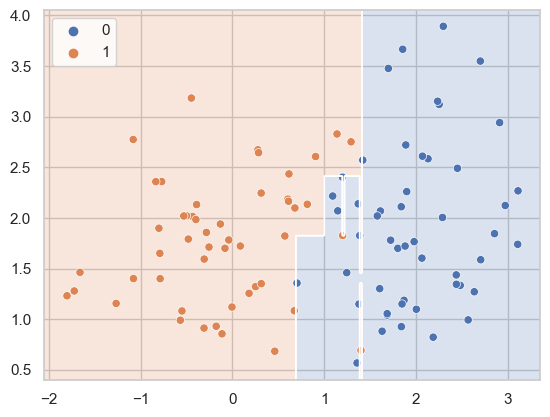

In [27]:
plot(clf, 2)

In [31]:
clf = GradientBoostingClassifier(loss = 'log_loss', n_estimators=10, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.92

In [32]:
clf = GradientBoostingClassifier(loss = 'exponential', n_estimators=10, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.92

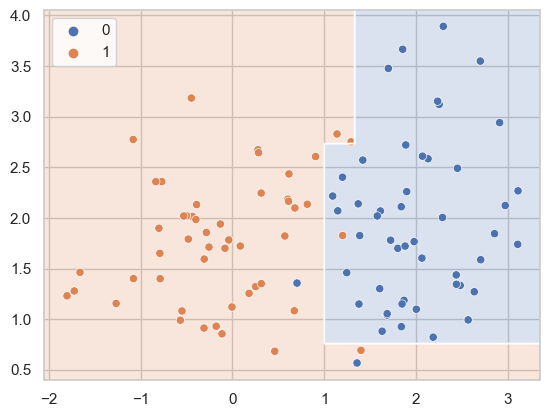

In [29]:
plot(clf, 2)

## Neural Network

### Set-up

Problems with **FIXED feature expansion $\phi$**:
* Difficult and time-consuming to find good features, requires a lot of engineering
* May require a large number of features to represent some sets of functions; e.g. the number of interaction terms of order 3 (of type $x_{i1} x_{i2} x_{i3}$) scales as $p^3$

Alternative: **Adaptive basis functions $\phi_{\theta_k}$** (E.g. Neural Networks).

|                                                        | Regression                         | Classification $(K=2)$                                 | Classification $(K=2)$ Alternative           |
| :-                                                     | :-:                                | :-:                                                    | :-:                                          |
| **Prediction Rule** $h: \mathcal X \to \mathcal Y$     | $h(x)$                             | $sign(f(x))$                                           | $\begin{cases}  1 & \text{if } \eta(x_i) \geq \frac{1}{2}\;*  -1 & \text{otherwise } \end{cases}$  |
| **Input Expansion** $\phi: \mathcal X \to \mathcal X'$ | $h_\beta(x) =\; \phi(x)^T\beta$  | $f_\beta(x) \; = \phi(x)^T\beta$                     | $*\;\eta(x_i) \; = sig(f(x_i)) \in [0,1]$             |
| **Adaptive basis functions** $\phi_{\theta_k}(x)$ | $\;\;$  $h(x) =\; \beta_0 + \sum_{k=1}^m  \beta_k \phi_{\theta_k}(x)$  $\;\;$  | $f(x) =\; \beta_0 + \sum_{k=1}^m \beta_k \phi_{\theta_k}(x)$ | - |
| **Neural Network:**                     | $h(x_i) = b^{(o)} + \sum_{k=1}^m w_k^{(o)}z_{ik}$ | $\eta(x_i) = sig(b^{(o)} + \sum_{k=1}^m w_k^{(o)}z_{ik})$      | (see notes for $K \geq 3$)   |

|                                                        | Regression                         | Classification $(K=2)$                                 | Classification $(K=2)$ Alternative           |
| :-                                                     | :-:                                | :-:                                                    | :-:                                          |
| **Prediction Rule** $h: \mathcal X \to \mathcal Y$     | $h(x)$                             | $sign(f(x))$                                           | $\begin{cases}  1 & \text{if } \eta(x_i) \geq \frac{1}{2}\;*\\  -1 & \text{otherwise } \end{cases}$  |

| Hidden unit $\phi_k(x_i)$ | Vector of hidden units | Output layer (para. to est.) | Hidden layer (para. to est.) | Total parameters|
| :-: | :-:                    | :-:          | :-:          | :-: |
| $z_{ik} = s( b_k^{(h)} + \sum_{j=1}^p w_{jk}^{(h)}x_{ij} )$ | $\;(z_{i1},...,z_{im}) \in \mathbb R^m\;$ | $\;\theta^{\,(o)} = (b^{\,(o)}, w_1^{(o)}, ..., w_m^{(o)}) \in \mathbb R^{m+1}\;$ | $\;\theta^{\,(h)} = (b_k^{(h)}, w_{1k}^{(h)}, ..., w_{pk}^{(h)})_{k=1,...,m} \in \mathbb R^{(p+1)m}\;$ | $\theta = (\theta^{\,(o)}, \theta^{\,(h)}) $ $\in \mathbb R^{(p+2)m+1}$ |

| Input example | bias term | weight term | act./transfer func. | # hidden units | "hidden"| "output" |
| :-:           | :-:       | :-:         | :-:                 | :-:            | :-:     | :-:      |
| $x_i \in \mathbb R^p$     | $b^{(o)}$, $b_k^{(h)}$ | $w_k^{(o)}$, $w_{jk}^{(h)}$ | $s$ | $m \geq 1$ | $^{(h)}$| $^{(o)}$ |

|                       | Rectified Linear Unit (ReLU) | Sigmoid                              | tanh          |
| :-:                   | :-:                          | :-:                                  | :-:           |
| **Activation $s(x)$** | $max(0,x)$                   | $\;sig(x)= (1+e^{-x})^{-1}\;$ | $tanh(x)$ | 

**Neural network: $p=2$ and $m=4$:**

1. Obtain $z_{ik}$ (latent representation of the example $i$ for neuron $k$) by taking a linear transformation of the input, then applying non-linear transformation $s$.
2. Obtain $h(x_i)$ by taking a linear transformation of the $z_{ik} = \phi_k(x_i)$ adaptive basis functions.

|Regression | Classification ($K=2$) | Classification ($K \geq 3$) |
| - | - | - |
|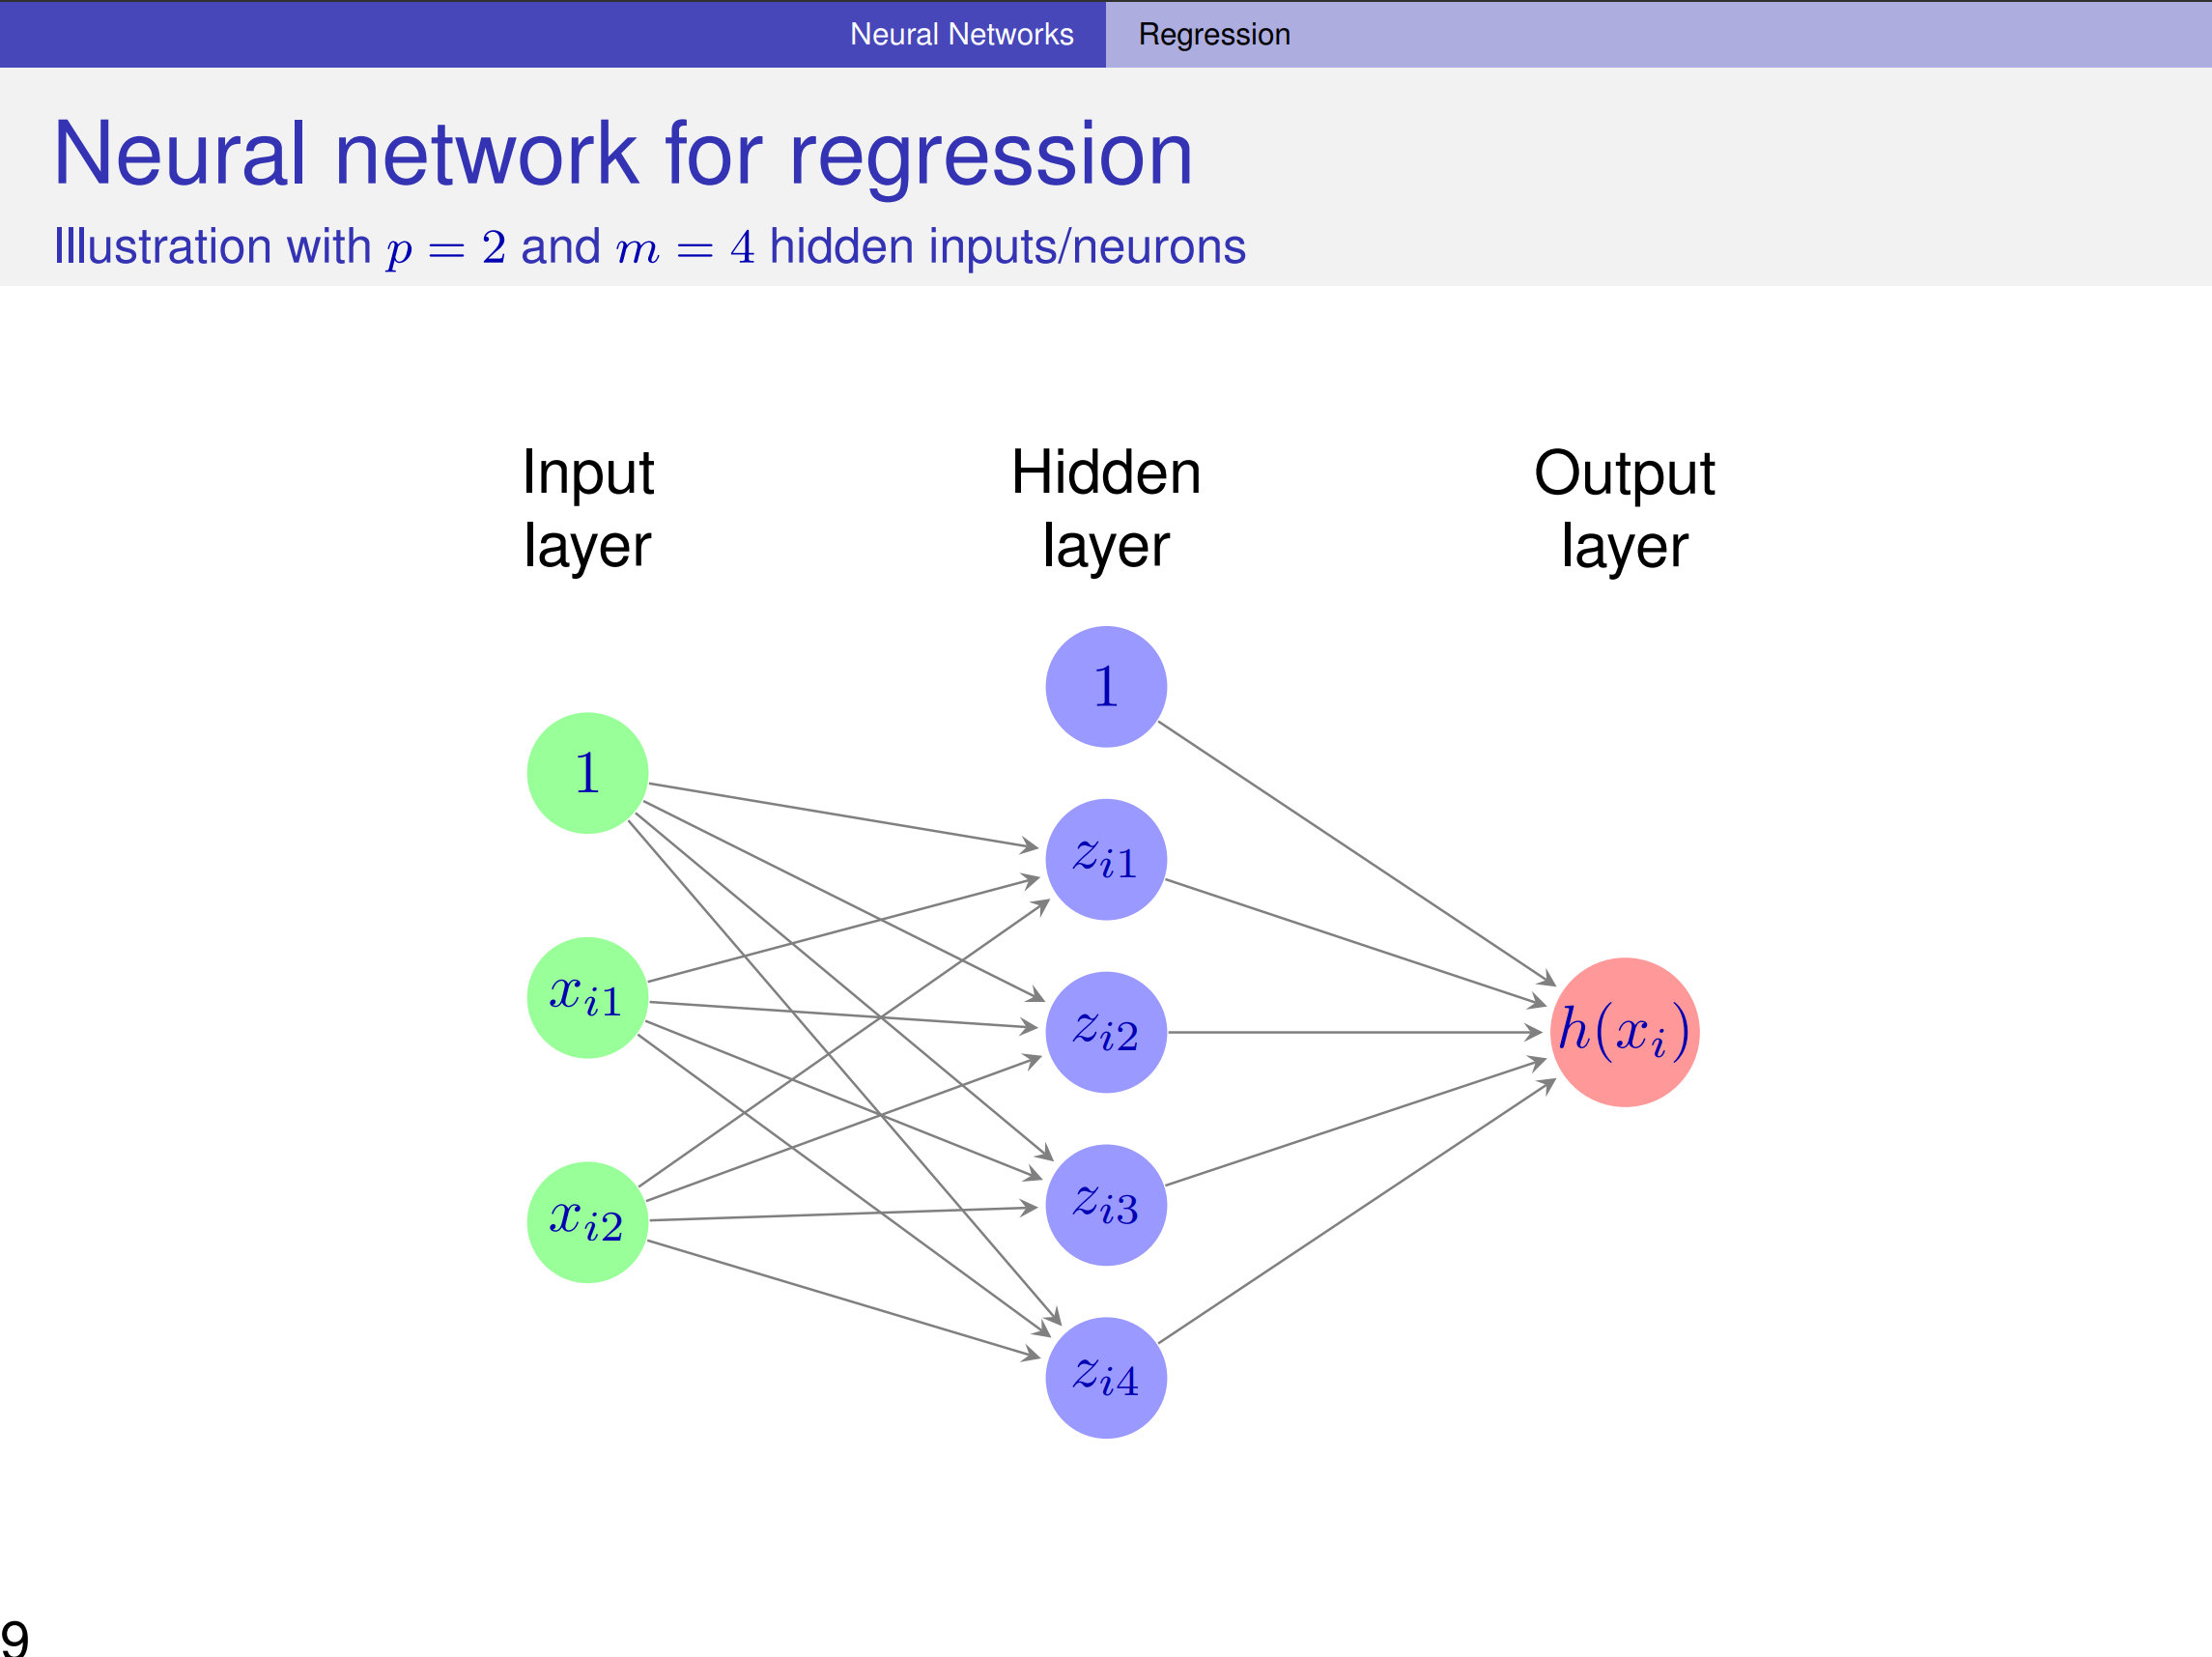 |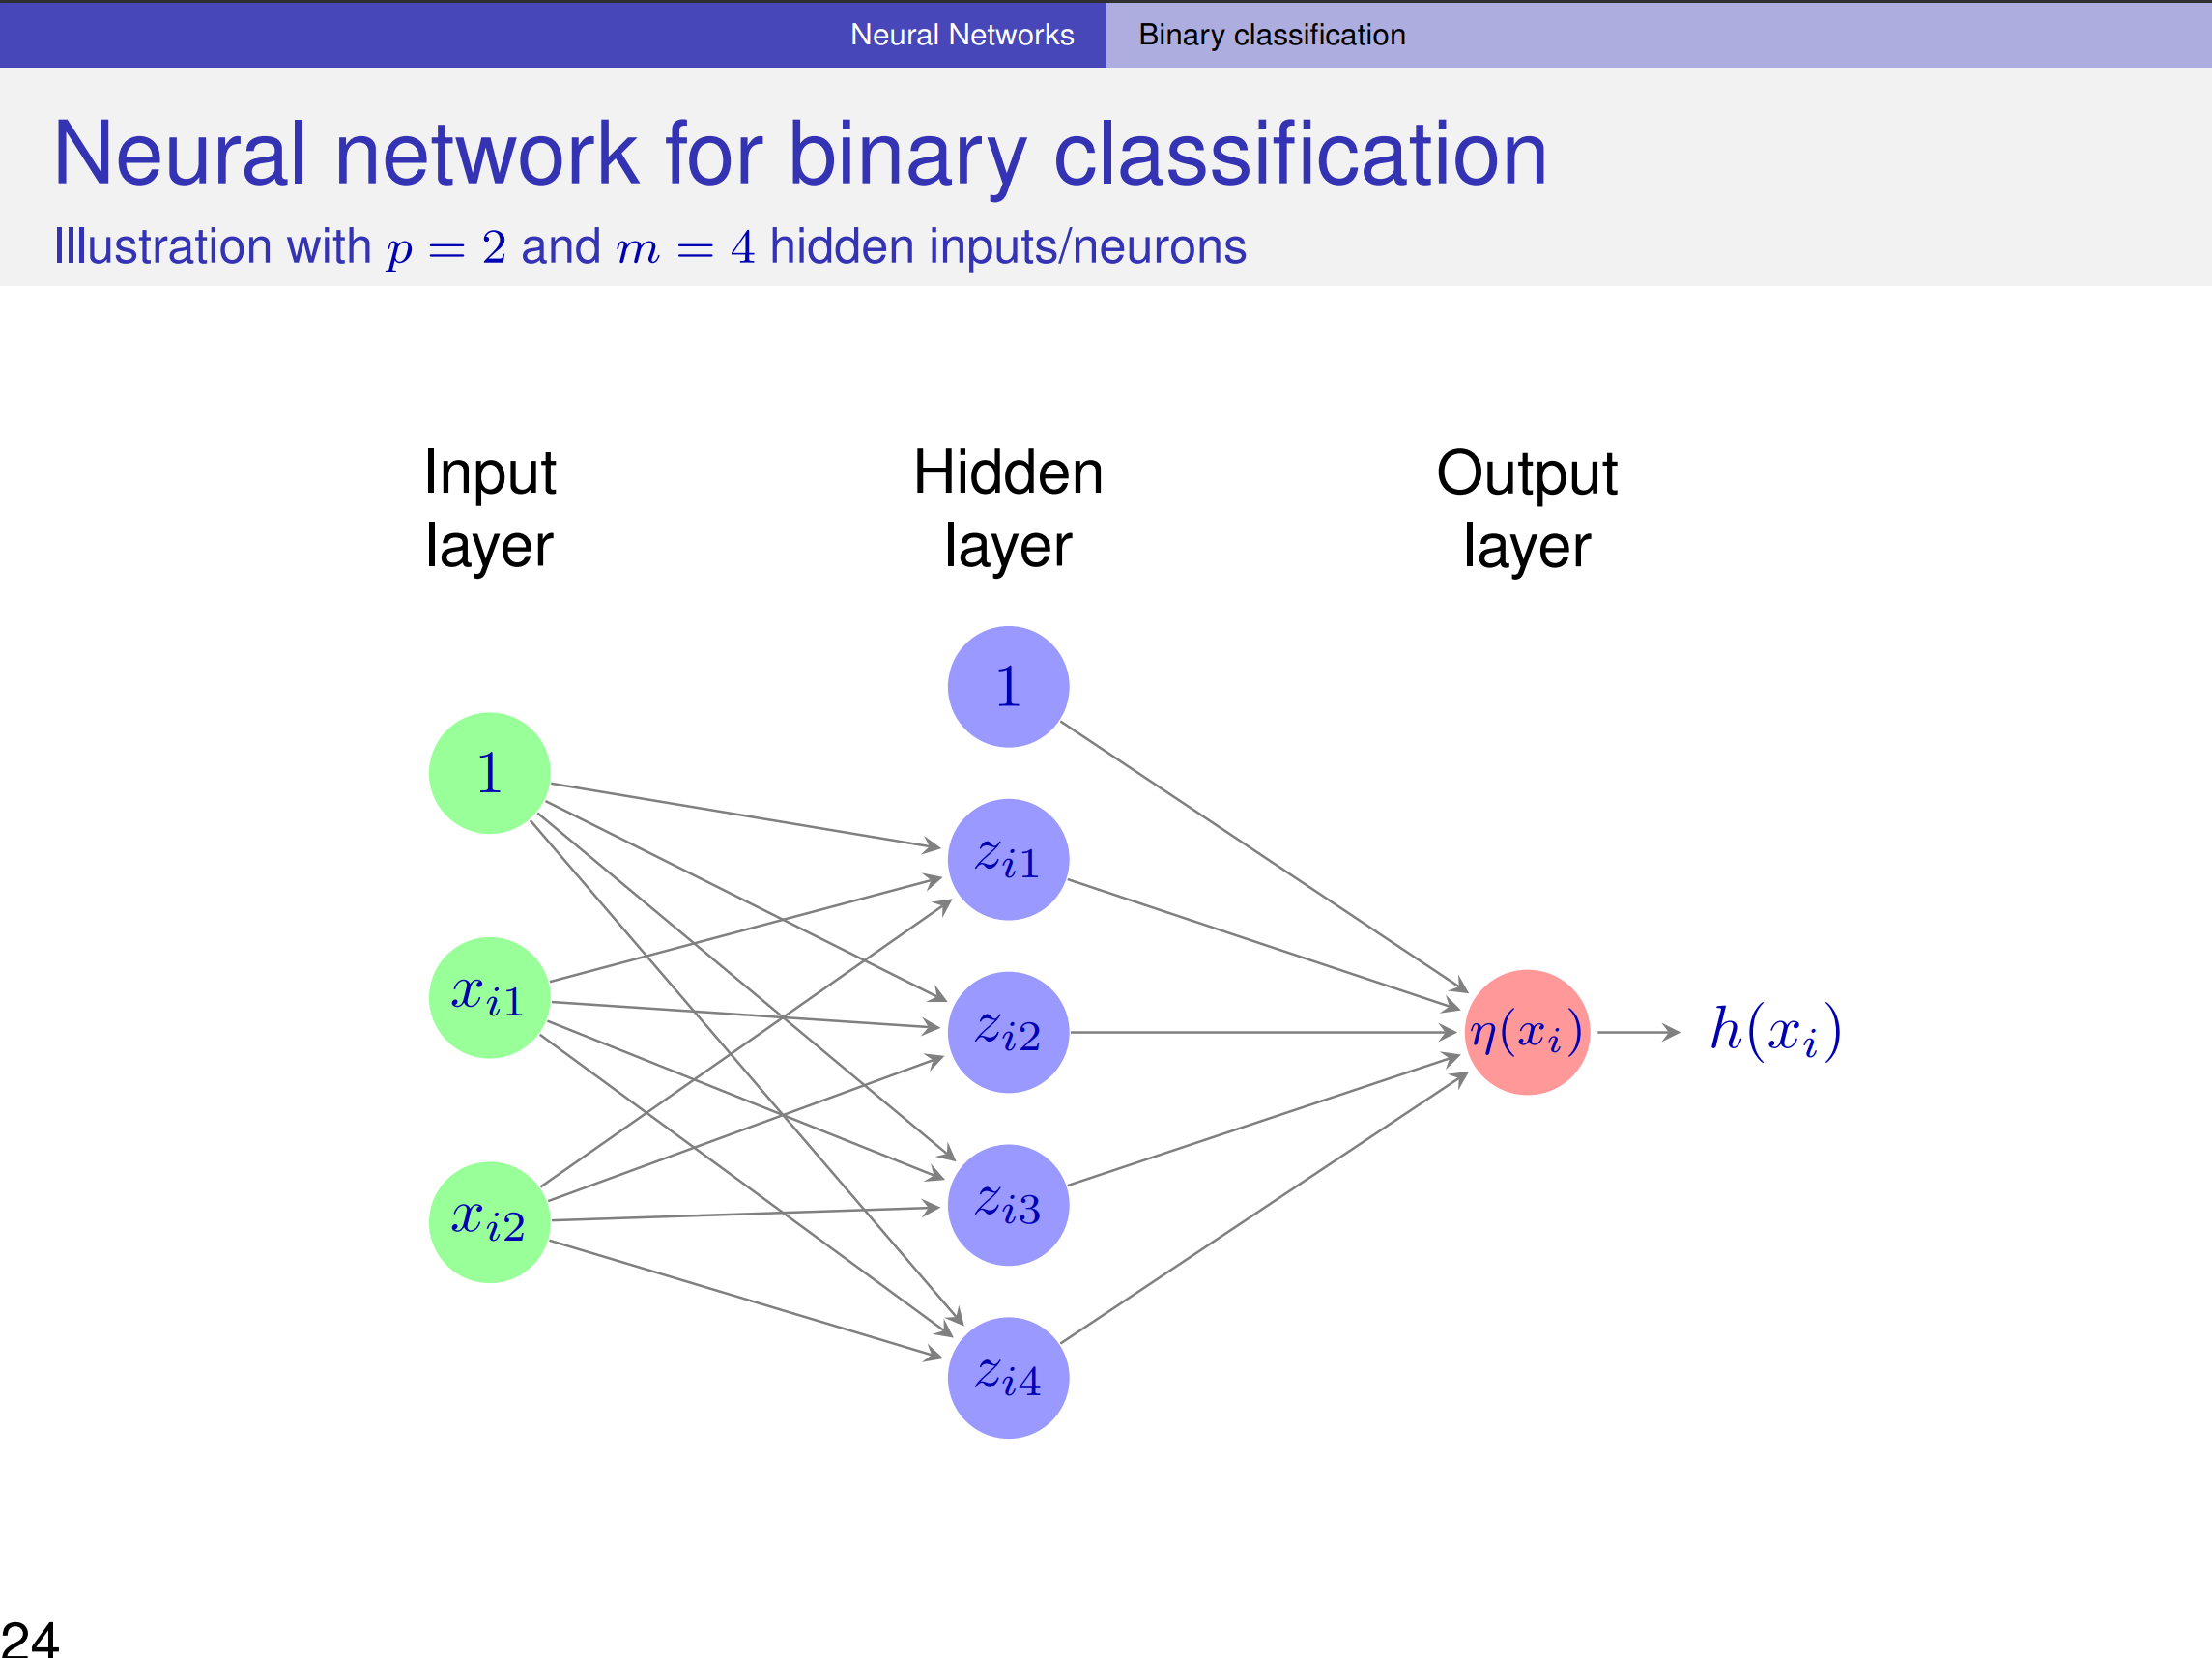 |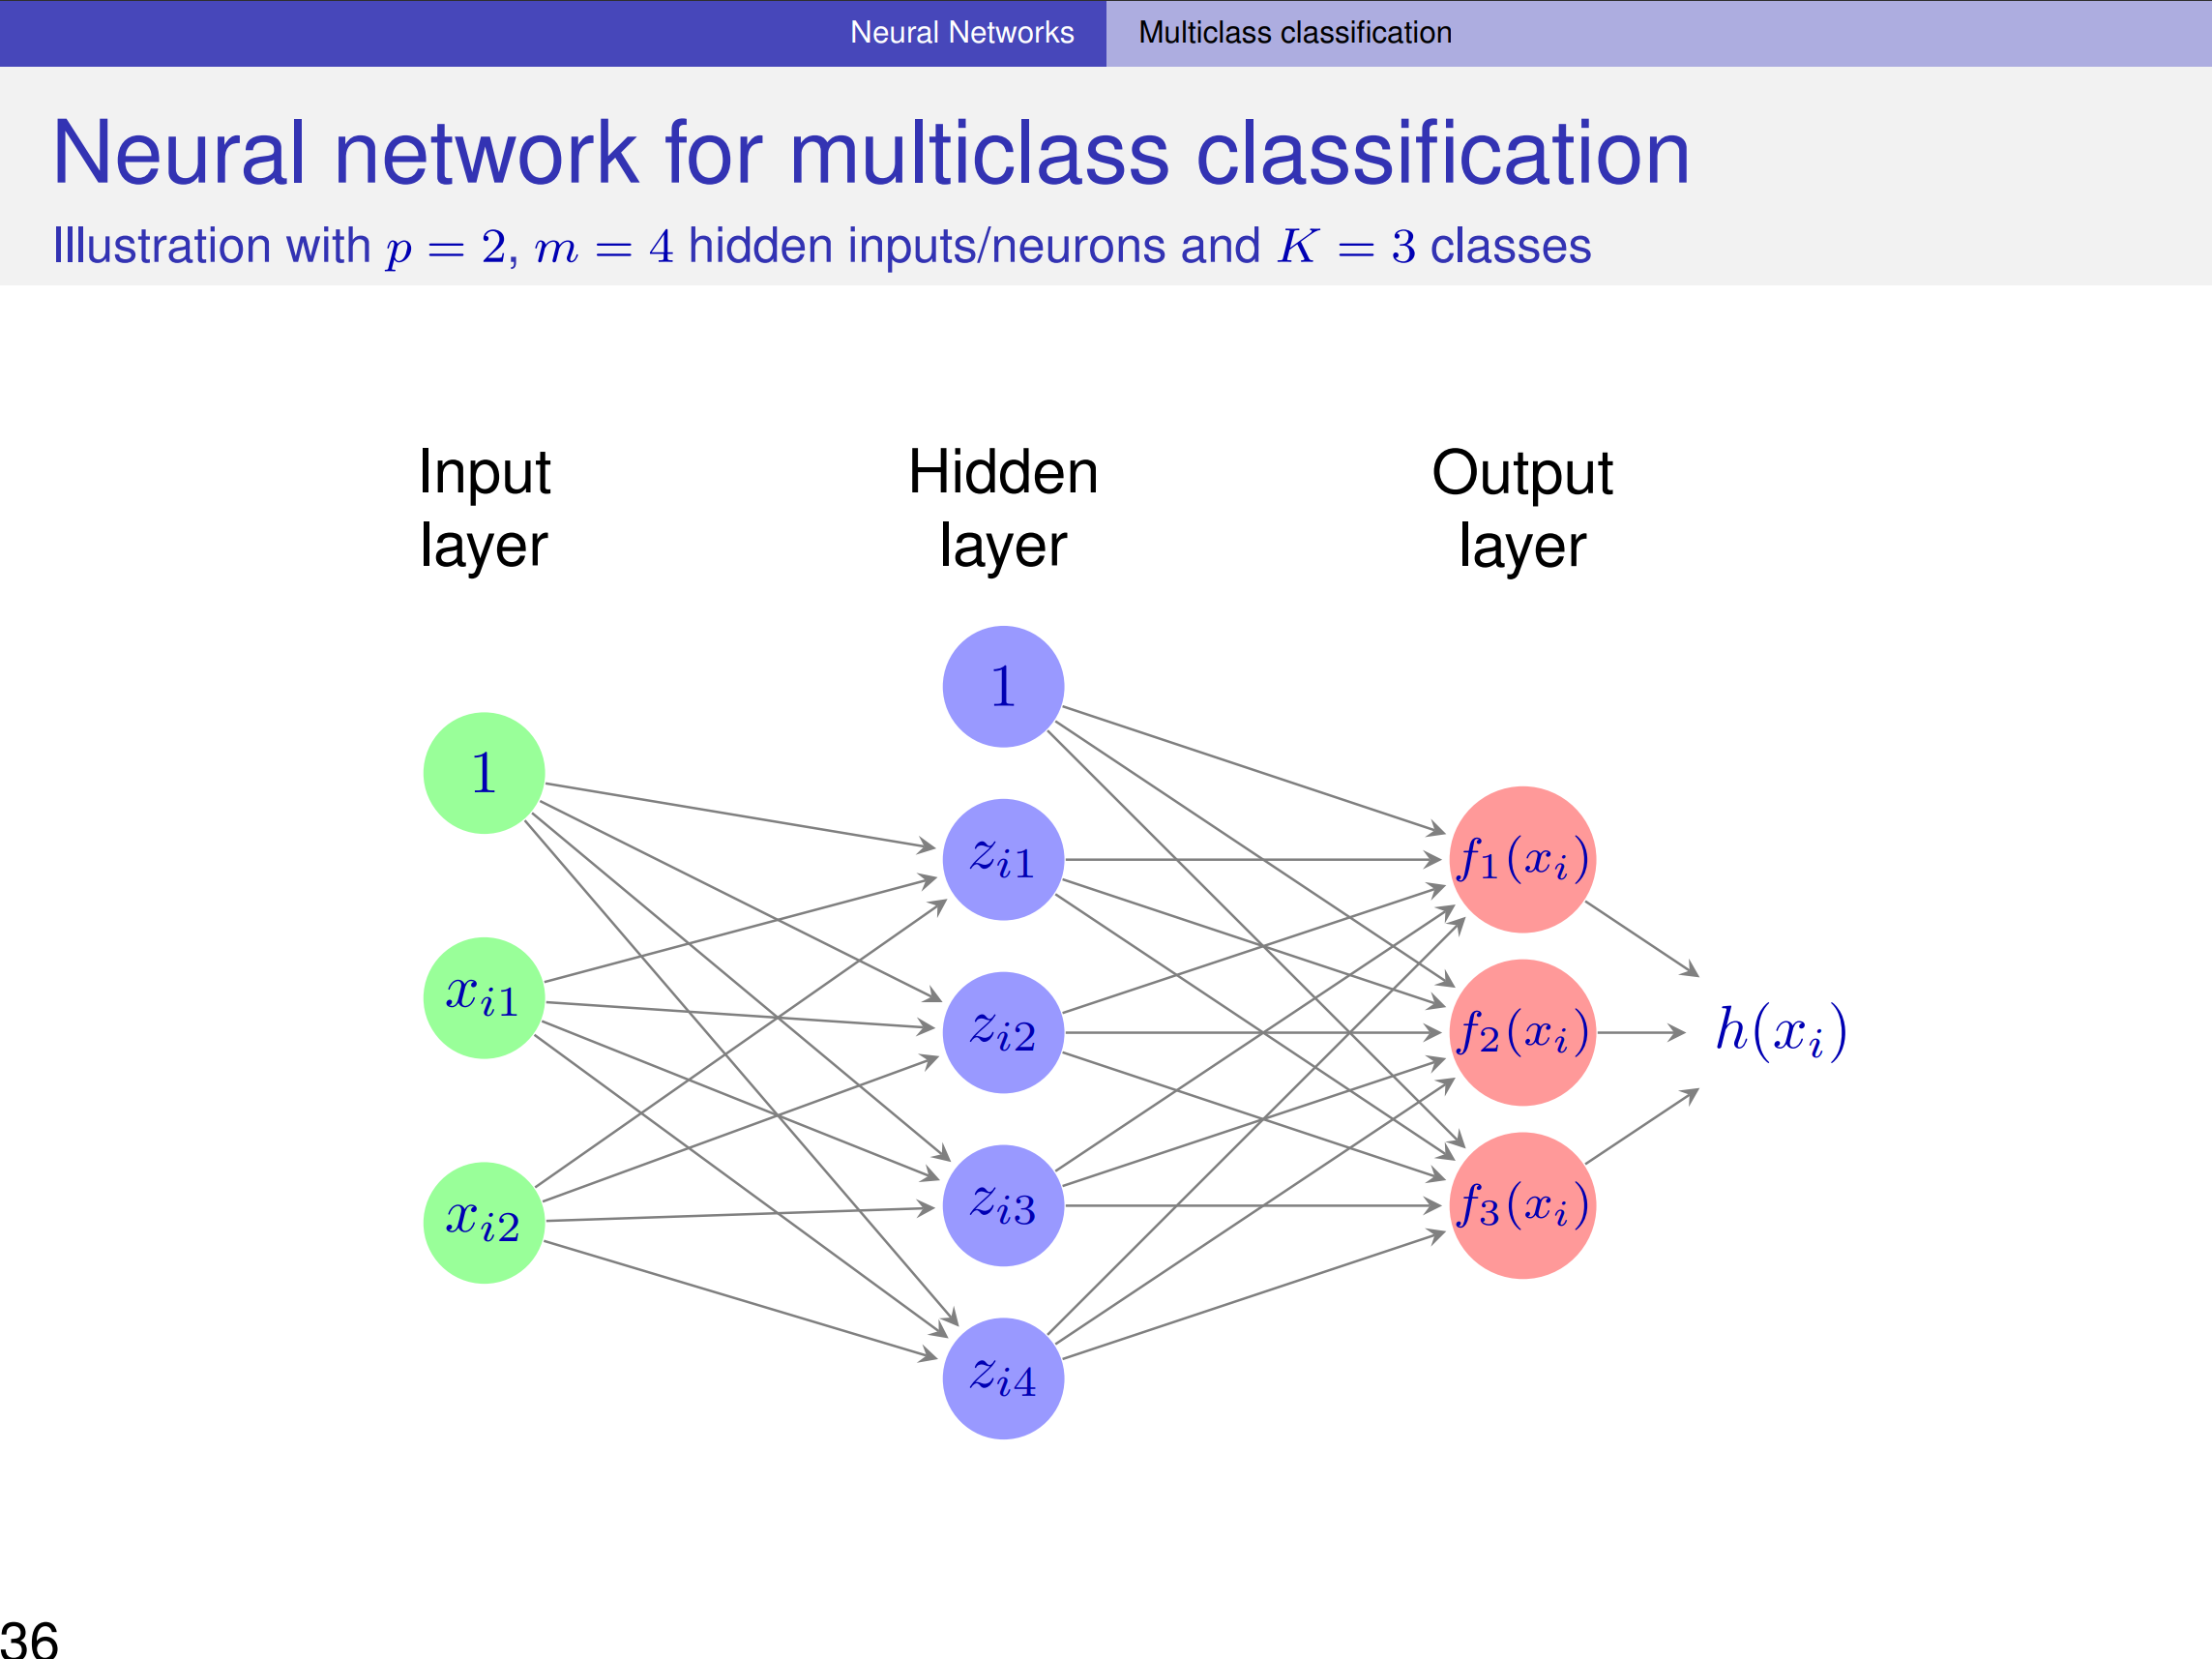|
|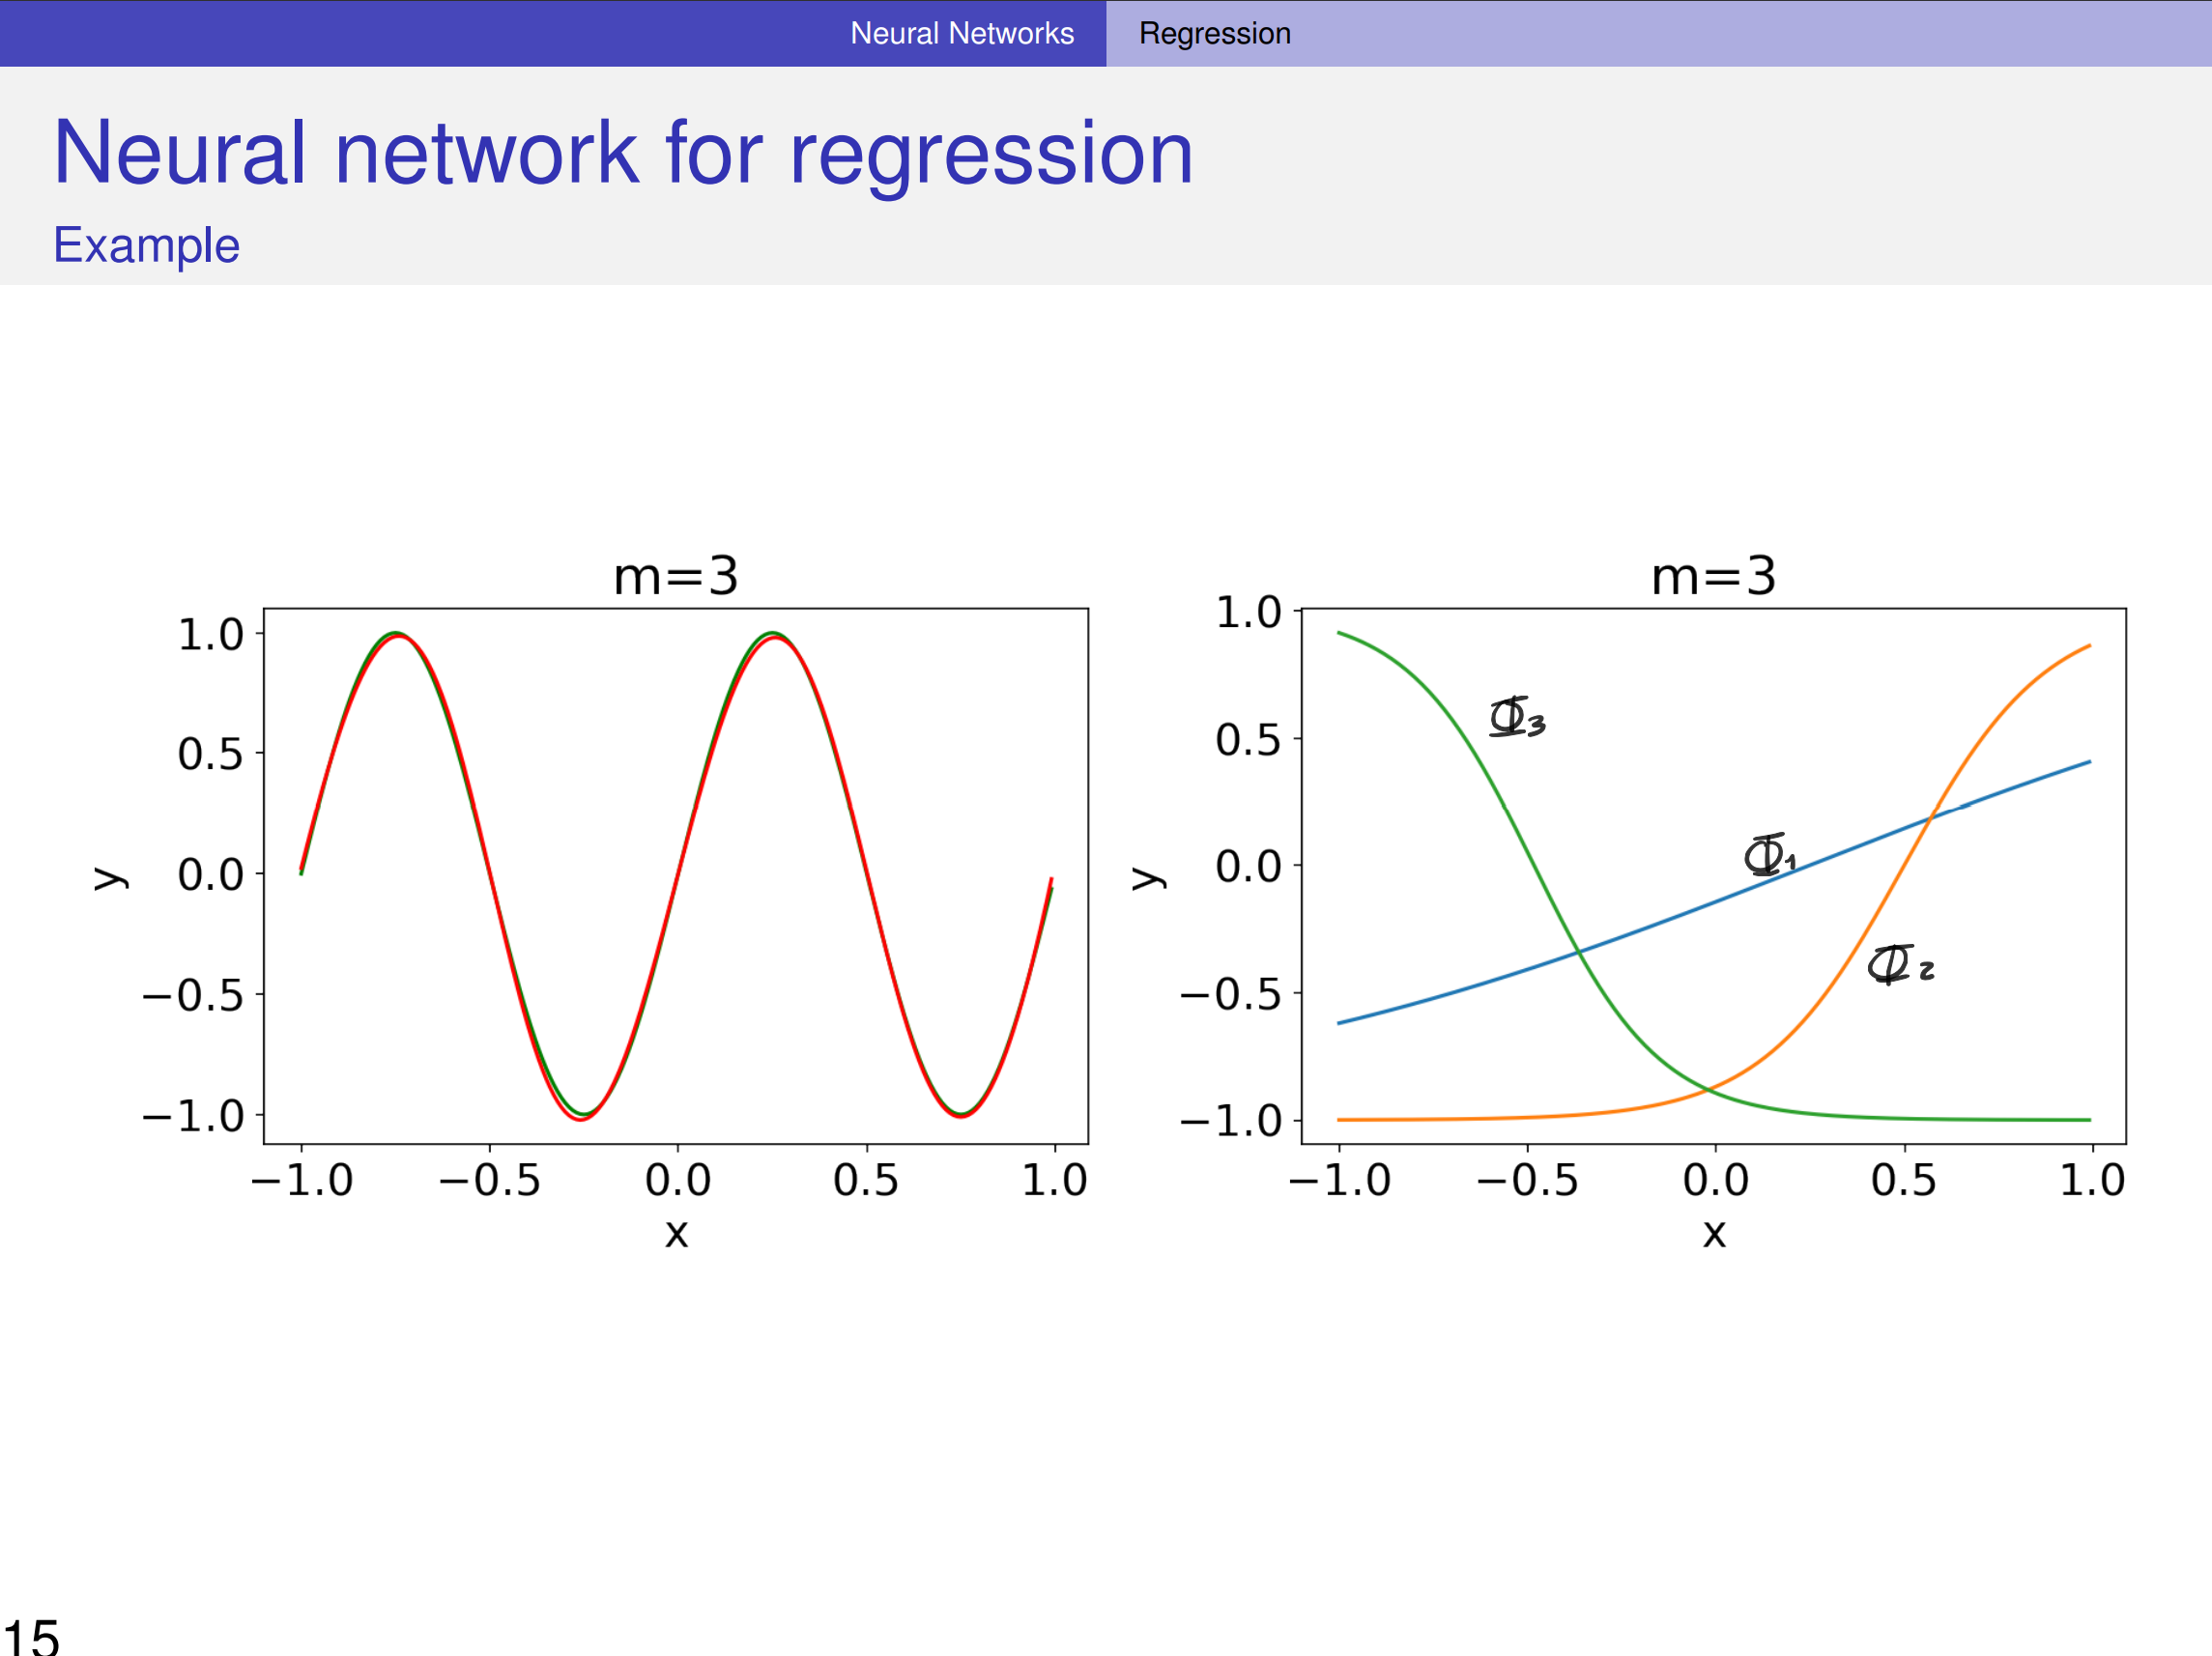 |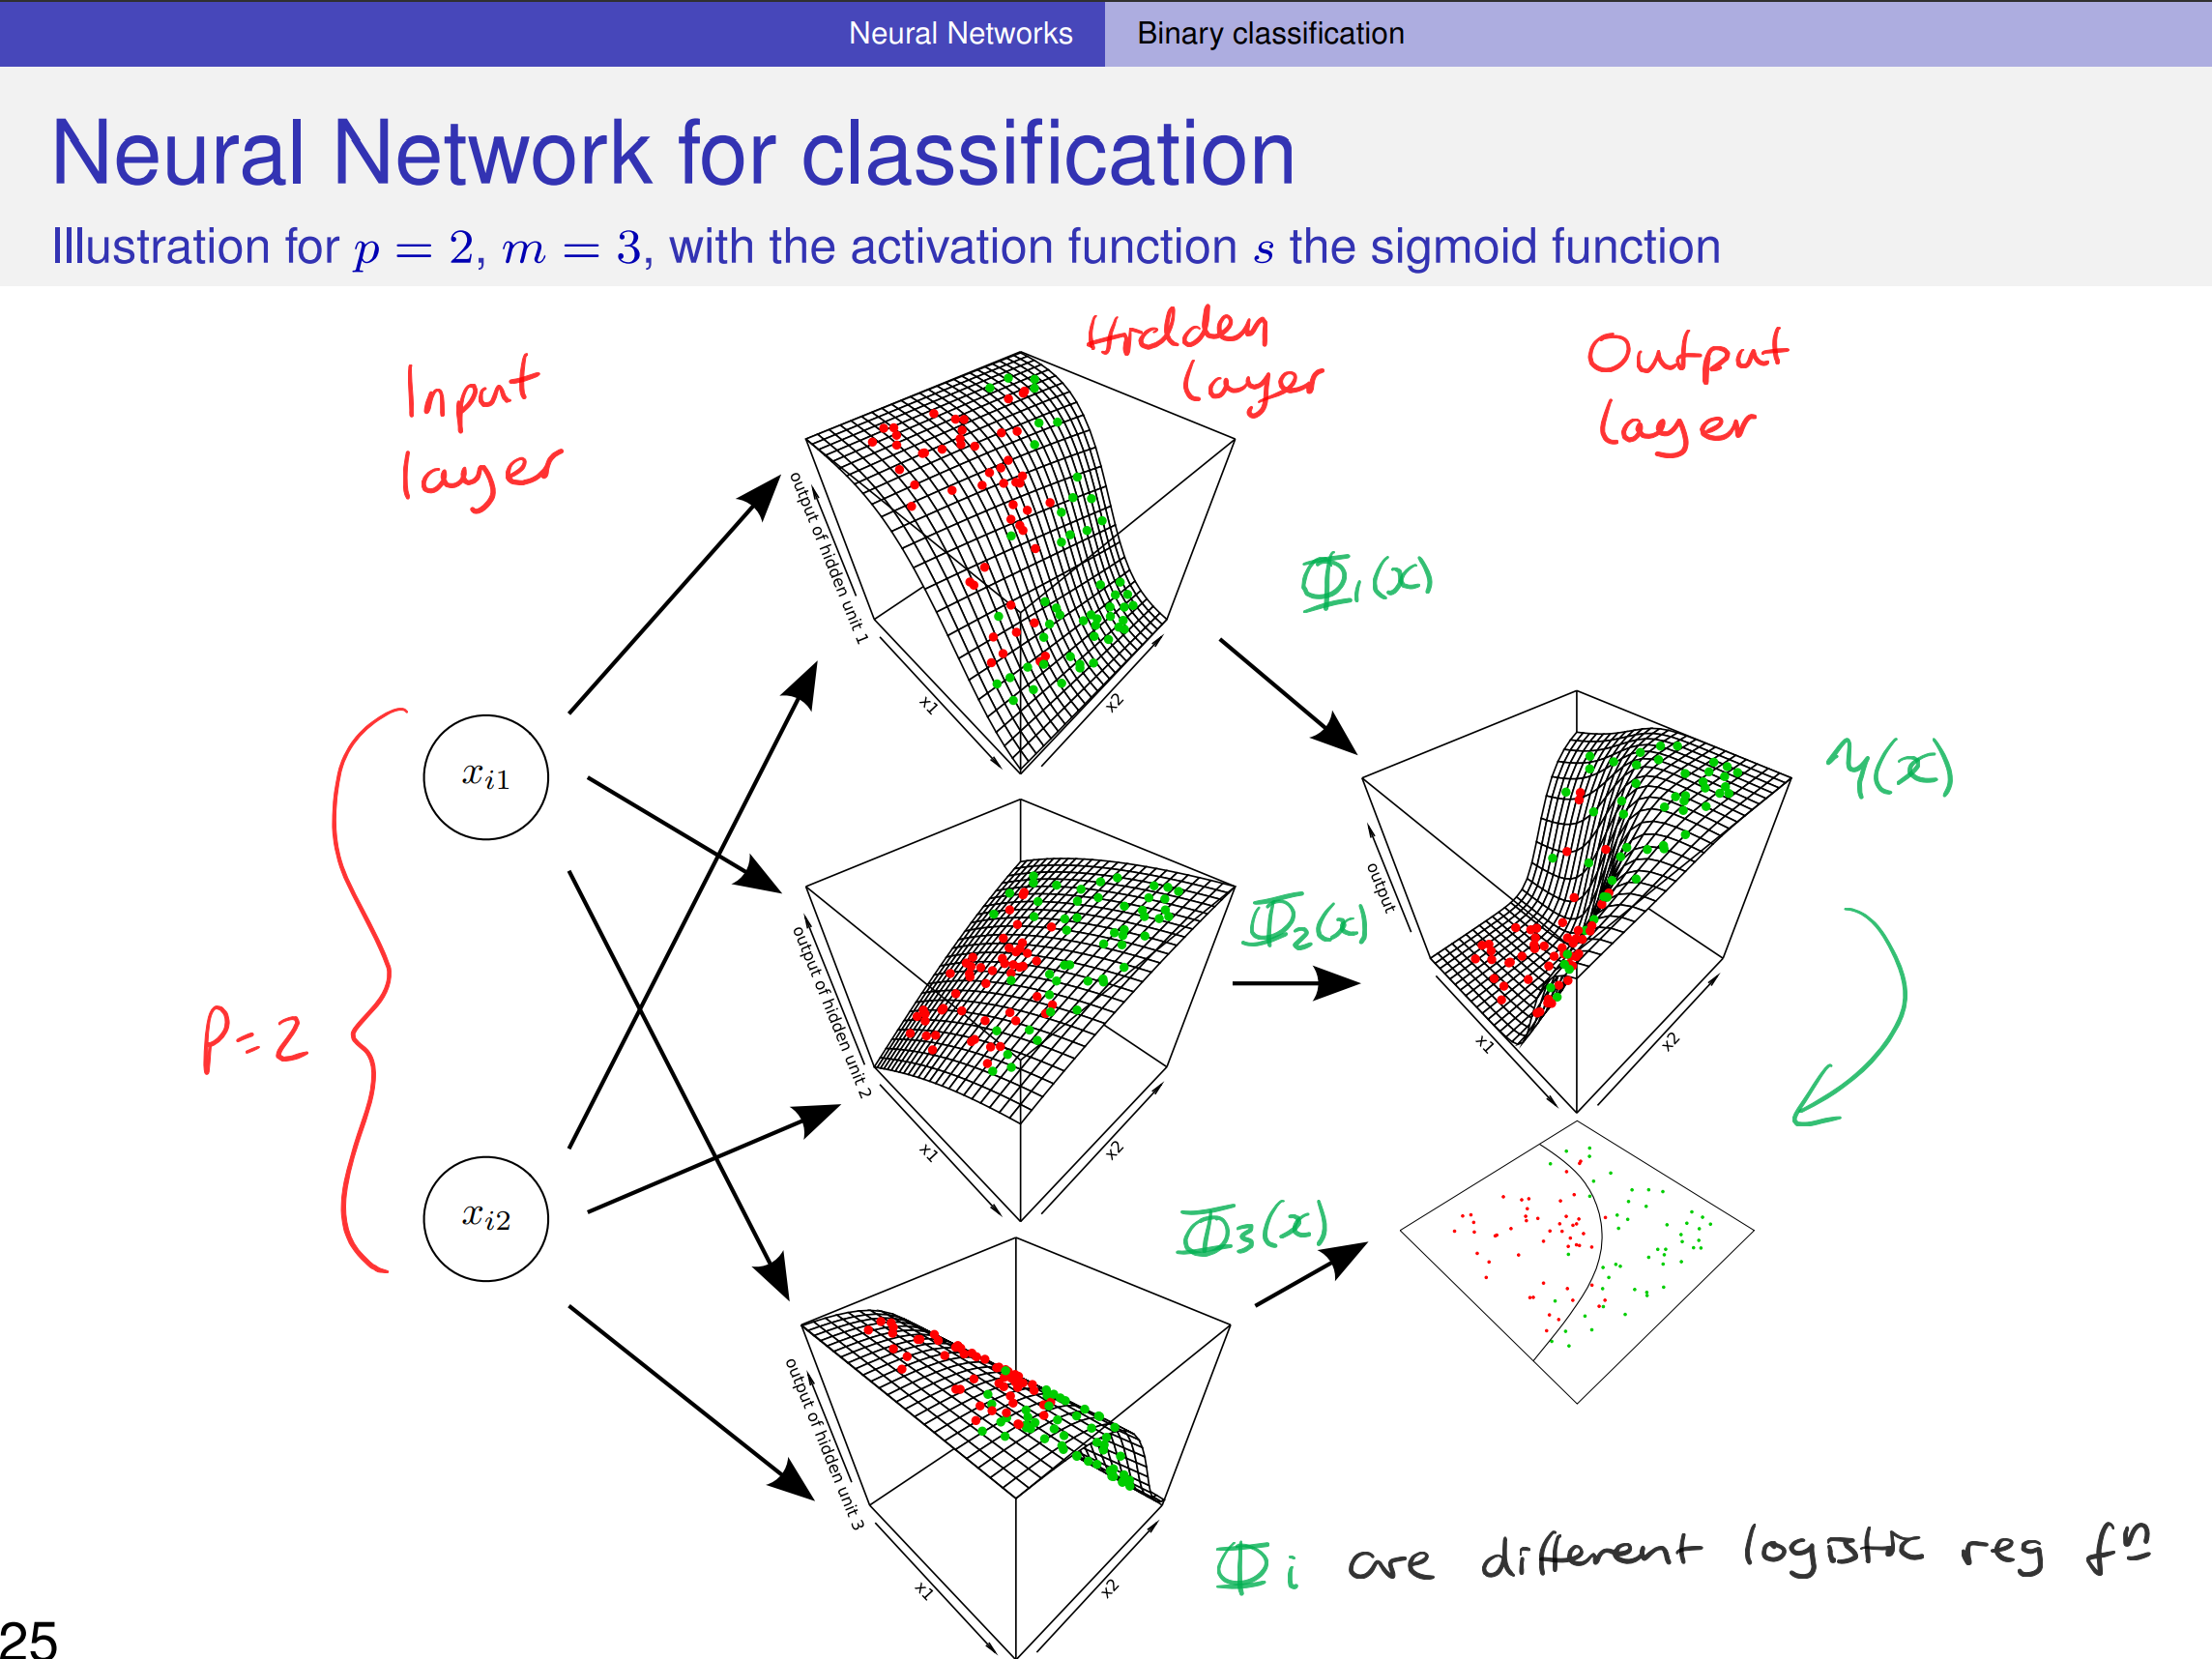 |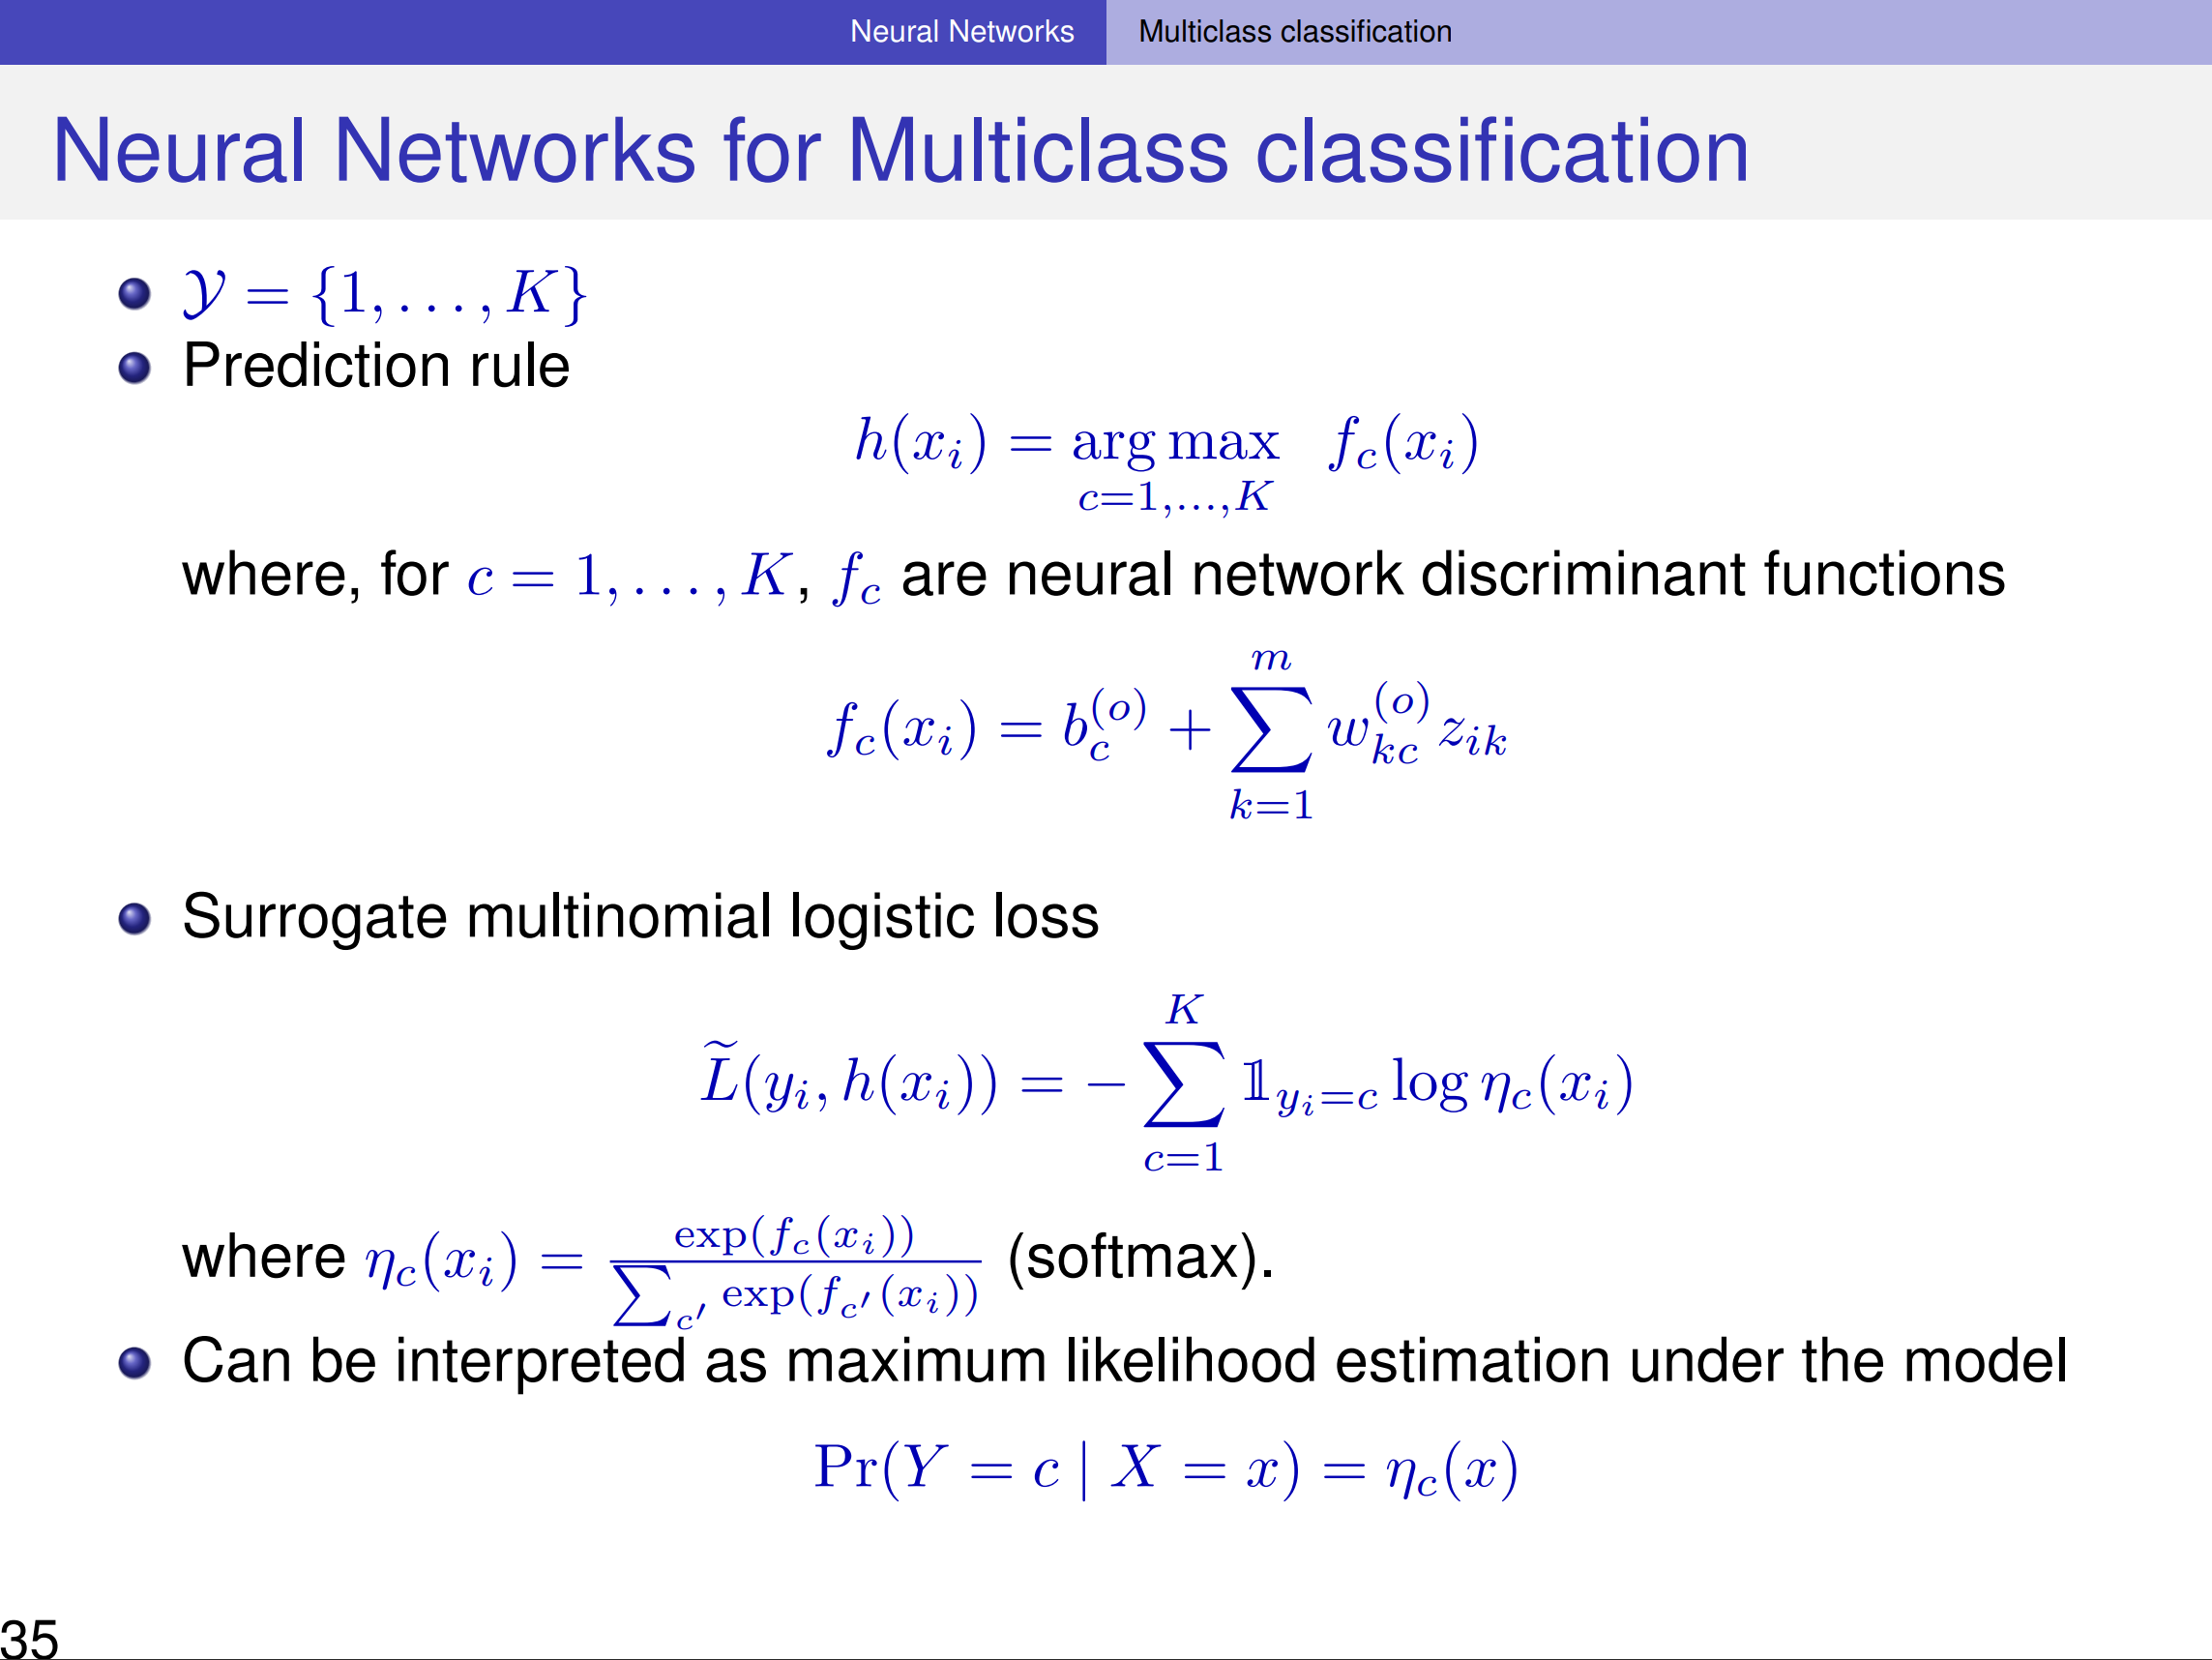|

Let $\mathcal F_{s,m}$ be the set of neural prediction rules with activation $s$ and $m$ hidden units.

**Theorem (Cybenko, 1989)**  
Let $[a,b] \subset \mathbb R$ and $h^*$ be a continuous real-values function on $[a,b]$. For any $\epsilon > 0$, there exists $m \geq 1$ and $h \in \mathcal F_{s,m}$ such that $$|h(x) - h^*(x)| < \epsilon \text{,}$$ for all $x \in [a,b]$.

* By increasing the number $m$ of neurons in the hidden later (width) we can approximate and continuous function on a closed interval at an arbitrary precision.
* Theorem applies more generally to compacts in $\mathbb R^p$, and activation functions satifying some mild assumptions.

### Estimate Parameters

#### Loss Function

**Regression**
* Squared loss: $$L = L(y_i, h_\theta(x_i)) = (y_i-h(x_i))^2$$


**Classification ($K=2$)**
* Surrogate Logistic loss: $$\tilde{L}(y_i, f_\theta(x_i)) = \frac{log(1+e^{-y_i f_\theta(x_i)}}{log(2)} = \frac{-logsig(y_i f_\theta(x_i))}{log(2)} = \frac{-log \eta_\theta(x_i) \mathbb 1_{y_i = 1} -log(1- \eta_\theta(x_i) )\mathbb 1_{y_i = -1}}{log(2)}$$

* Surrogate Log-loss (drop $log(2)$): $$L = \tilde{L}(y_i, \eta_\theta(x_i)) = -log \eta_\theta(x_i) \mathbb 1_{y_i = 1} -log(1- \eta_\theta(x_i) )\mathbb 1_{y_i = -1}$$


**Classification ($K \geq 3$)**
* Surrogate Log-loss: $$L = \tilde{L}(y_i, \eta(x_i)) = - \sum_{c=1}^K log \eta_c(x_i) \mathbb 1_{y_i = c}$$

#### Parameters

1. **ERM:** $$\hat{\theta} = \underset{\theta}{arg \; min} \; \frac{1}{n} \sum_{i=1}^n L$$
2. **Plug-in:** $$\hat{\theta} = \underset{\theta}{arg \; max} \sum_{i=1}^n L$$
Regression: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Maximum likelihood, classifier under the model $f_\theta(y|x)= N(h(x), \Sigma)$.  
Classification ($K=2$): $\,$ Maximum likelihood, classifier under the model $Pr(Y=1|X=x)=\eta_\theta(x) = sig(f_\theta(x))$.  
Classifiaction ($K \geq 3$): $ \,$ Maximum likelihood, classifier under the model $Pr(Y=c|X=x)=\eta_c(x) = sig(f_c(x))$.  

#### Regularisation

Parameters $\theta \in \mathbb R^{(p+2)m+1}$ prone to overfitting is $m$ large.

**Weight decay** (Tikhonov/L2 regularisation on the weights)**:** $$pen(h_\theta) = \sum_{jk} (w_{jk}^{(h)})^2 + \sum_ k(w_k^{(o)})^2$$

#### Overall

Minimise objective function $J: \mathbb{R}^p \to \mathbb{R}_+$  
$$J(\theta) = \sum_{i=1}^{n} J_i(\theta) + J_0(\theta) = \frac{1}{n} \sum_{i=1}^{n} \tilde{L}(y_i, \eta_\theta(x_i)) + \frac{\lambda}{n}pen(h_\theta)$$

* Does not admit a closed-form global minimum
* Non-convex
* Usually resort to (stochastic) gradient descent methods to find a local minimum
  - Different initialisations may lead to different local minima
  - Early stopping can also be used as implicit regularisation

Find: $$\widehat \theta = \underset{\theta \in \Theta}{arg \; min} \; J(\theta)$$

## Deep Learning

||  |
| - | - |
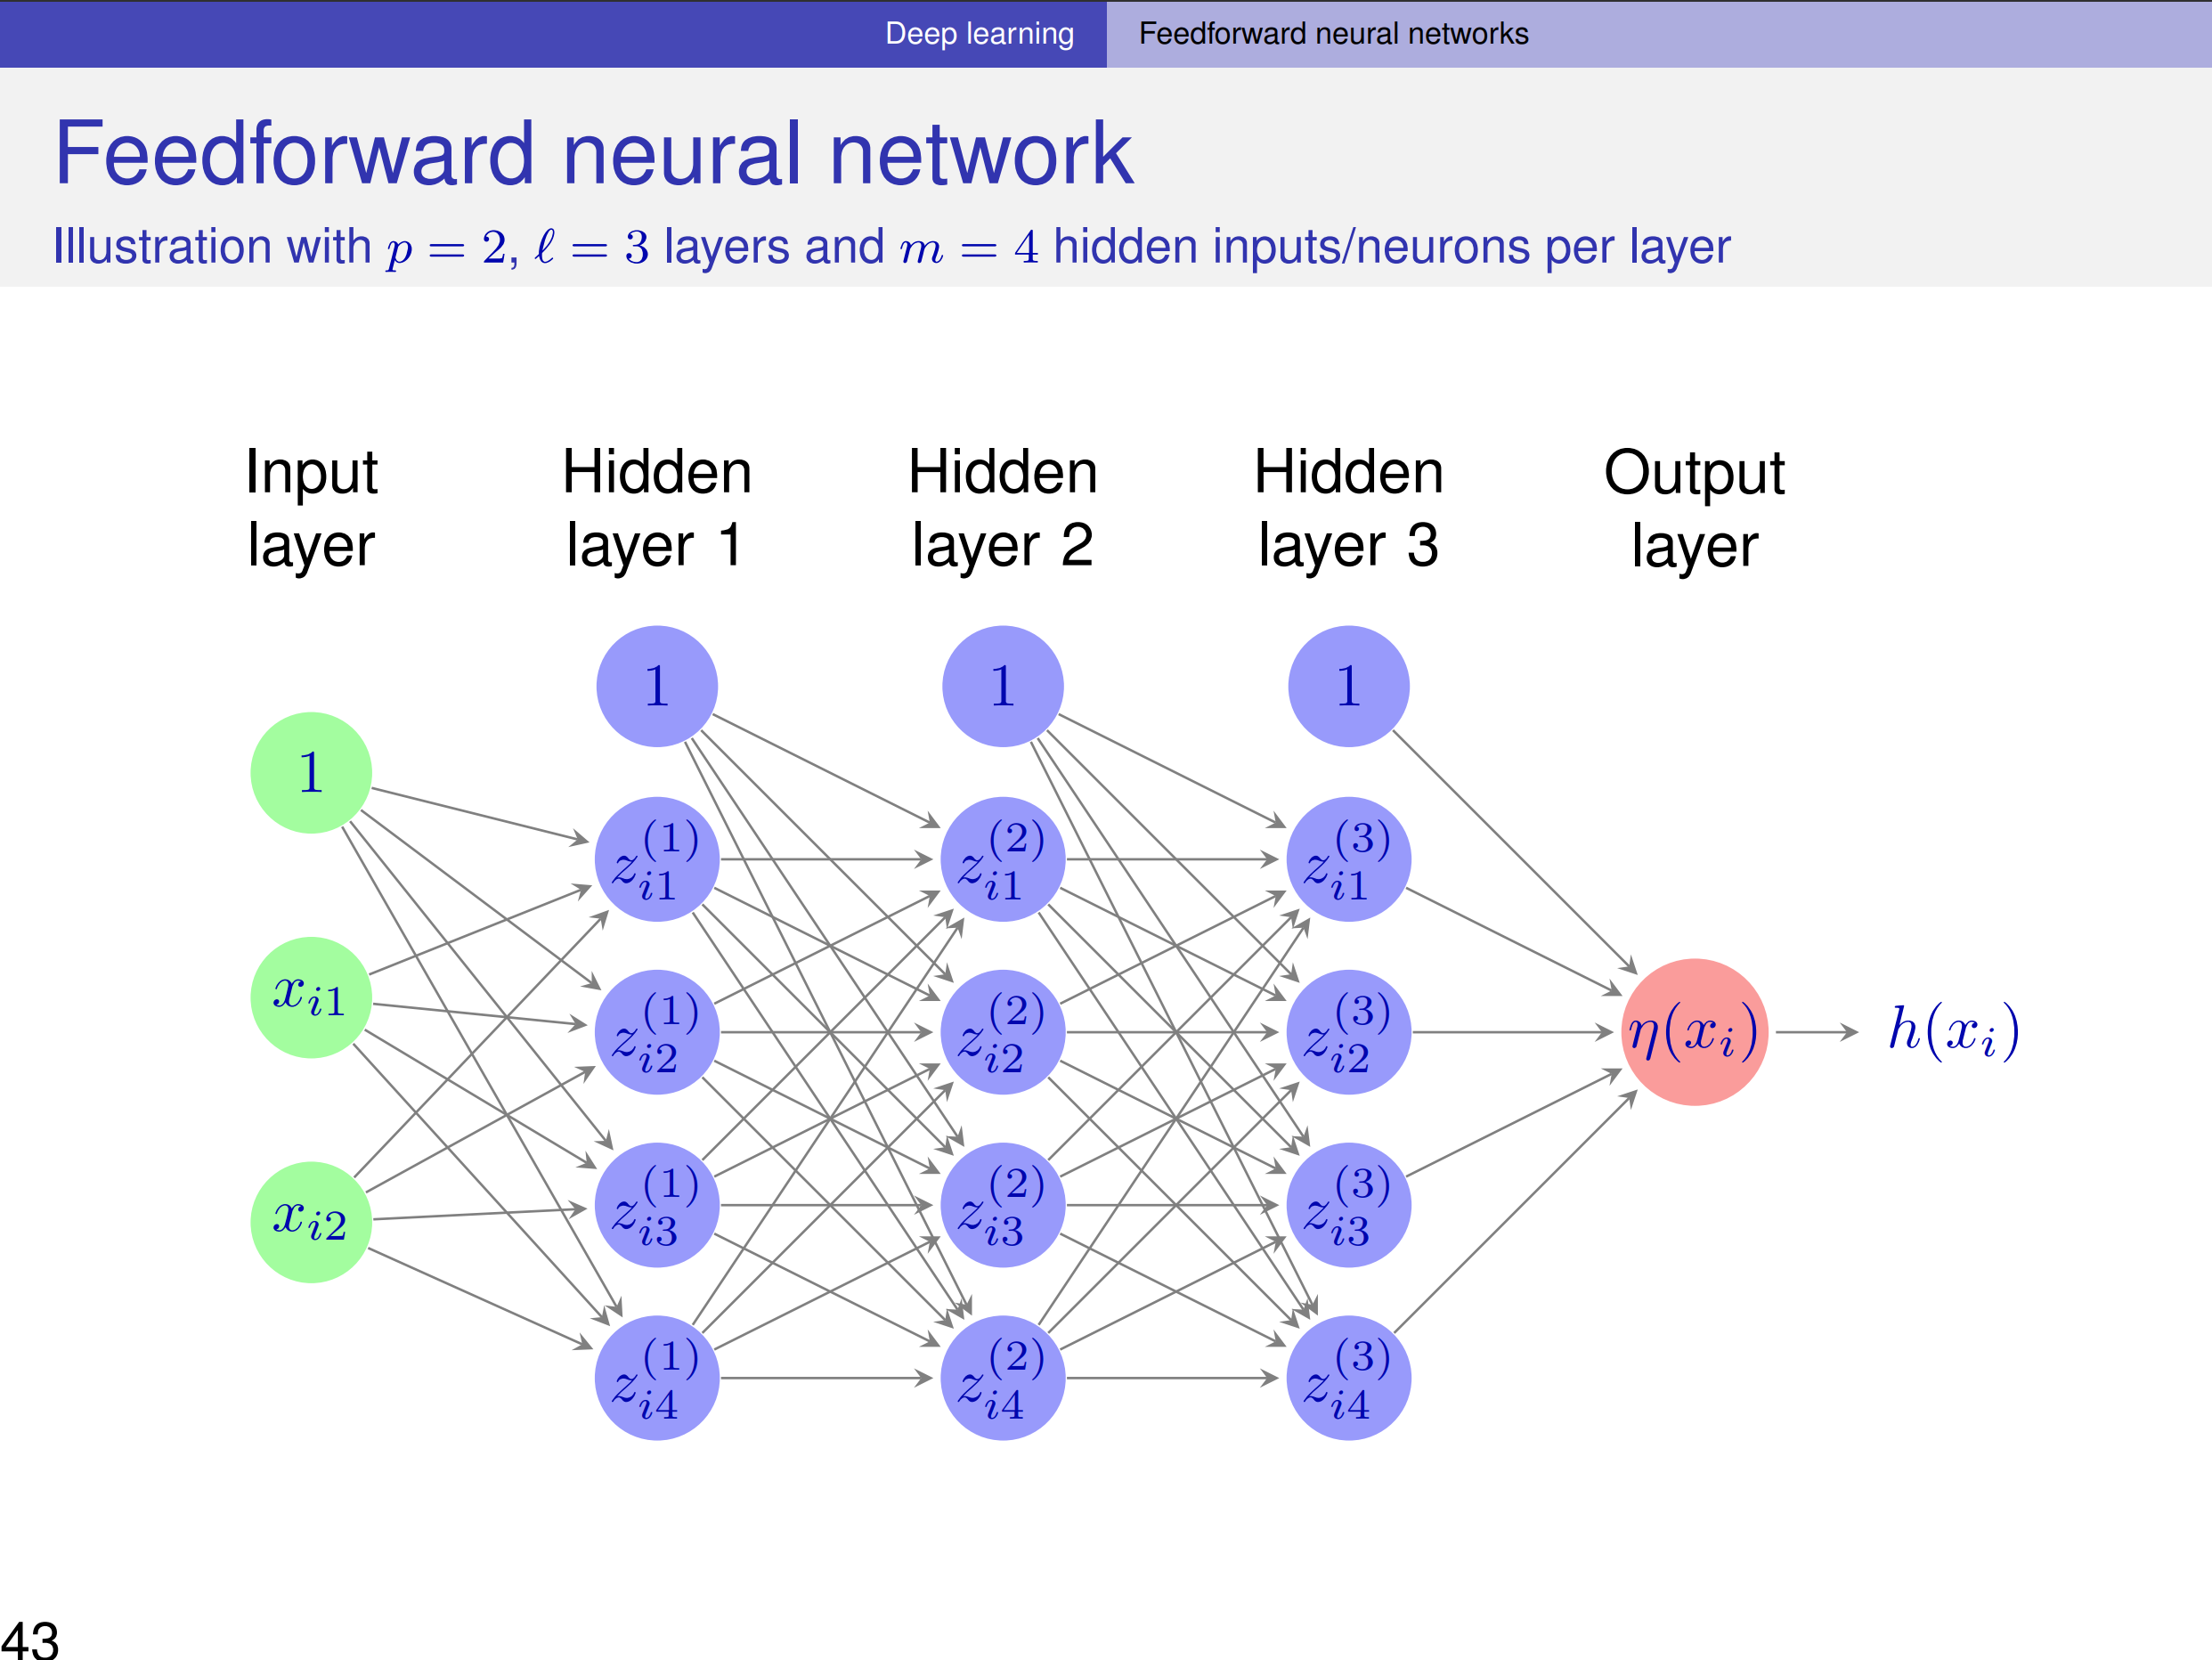|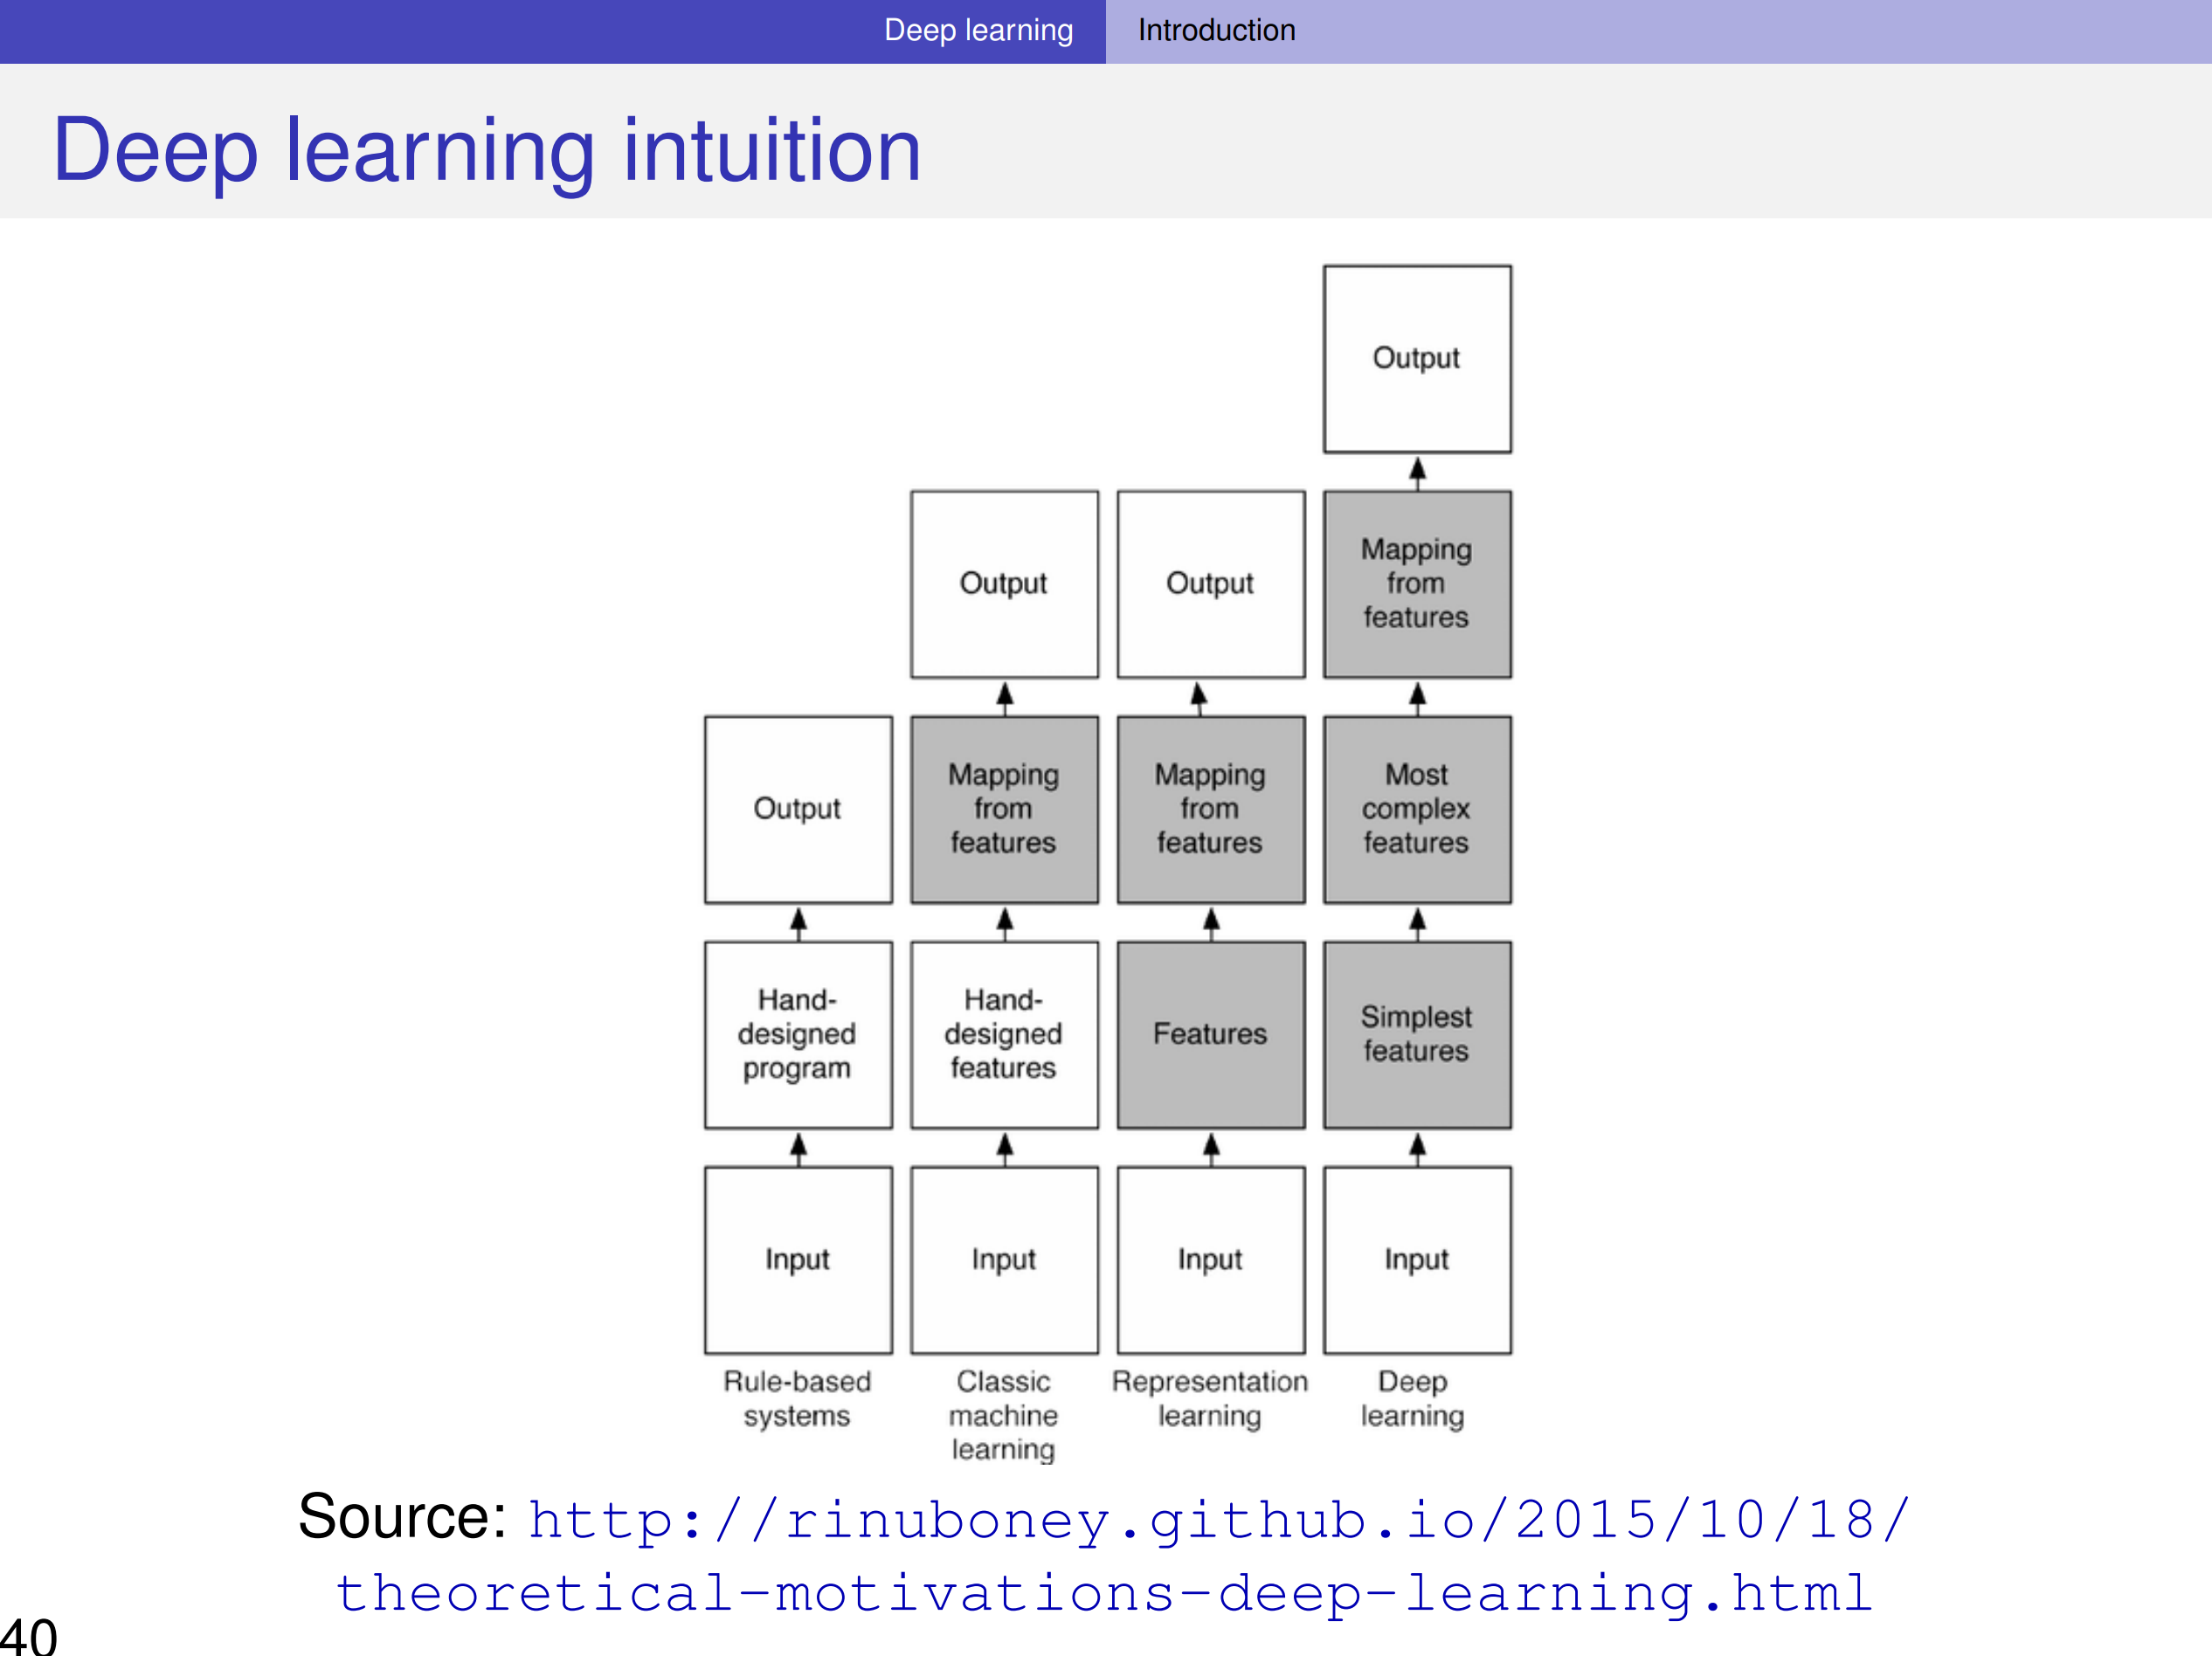

#### Why do we need deep networks?

**Shallow network issues:**
* May need very large $m$
* May not be able to estimate $\theta$

**Batches:**


## Linear SVM

## RBF SVM

# Regression

| Model                   |Type            | Speed | Dataset size    | Assumptions         | Notes
| :-                      | :-             | :-    | :-              | :-                  | :-     
| Linear Regression       | Generative     | Fast  |                 |                     |
| Decision Trees          | Discriminative | Fast  |                 |                     |
| Gradient Boosting Trees | Discriminative | Slow  |                 |                     | Similar to Random Forest, but easier to overfit
| Random Forest           | Discriminative | Slow  |                 |                     |
| Neural Network          | Discriminative | Fast  |                 |                     | Needs a lot of data points

## Ridge, Lasso, Elastic Net

In [205]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [154]:
X = sinusoid[0].reshape(-1, 1)
y = sinusoid[1].reshape(-1, 1)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.25
)

0.19302812845791473
0.5584089505937169


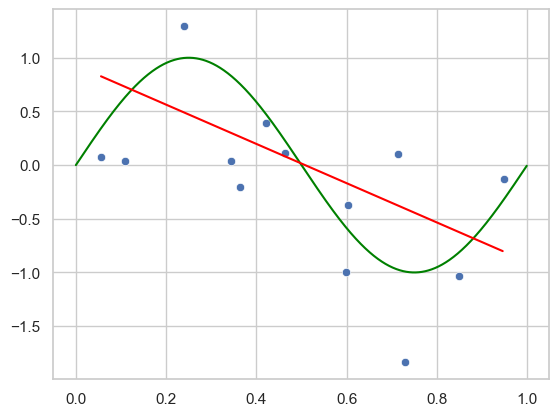

In [206]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

plot2(X_test, y_test)

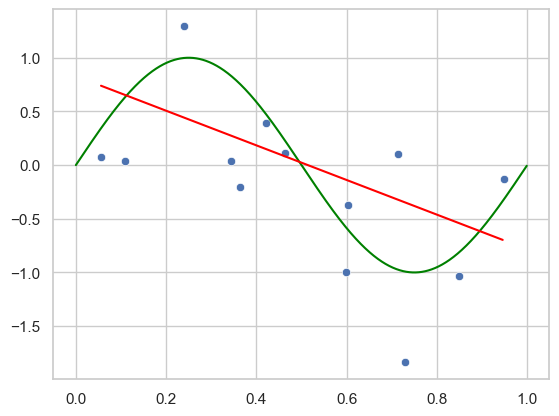

In [172]:
reg = Ridge(alpha=0.5)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

plot2(X_test, y_test)

## Decision Trees

Partition $\mathcal X$ into $R$ disjoint sets $(\mathcal R_1,...,\mathcal R_R)$

$$h(x) = \sum_{j=1}^{R} \beta_j \mathbb 1_{x \in \mathcal R_j}$$

**Classification (squared loss):**  
$$\widehat \beta_j = \frac{ \sum_{i=1}^{n} y_i \mathbb 1_{x_i \in \mathcal R_j}}{ \sum_{i=1}^{n} \mathbb 1_{x_i \in \mathcal R_j}}$$

**Growth Heuristics for Regression Trees (K classes):**

**STEPS:**
1. Start with $\mathcal X = \mathbb R^p$
2. For each feature $j=1,...,p$, split data: $I_< = \{i:x_ij < v\}$ and $I_> = \{i:x_ij \geq v\}$ 
3. Estimate parameters: $\beta_< = \frac{\sum_{i \in I_<} y_i}{|I_<|}$ and $\beta_> = \frac{\sum_{i \in I_>} y_i}{|I_>|}$
4. Choose $\underset{j, v}{arg \; max} \; ( \sum_{i \in I<}(y_i - \beta_<)^2 + \sum_{i \in I>}(y_i - \beta_>)^2)$ (quality of split)

In [207]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree

In [218]:
X = sinusoid[0].reshape(-1, 1)
y = sinusoid[1].reshape(-1, 1)

# X = diabetes_np.data[:, 2]
# y = diabetes_np.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

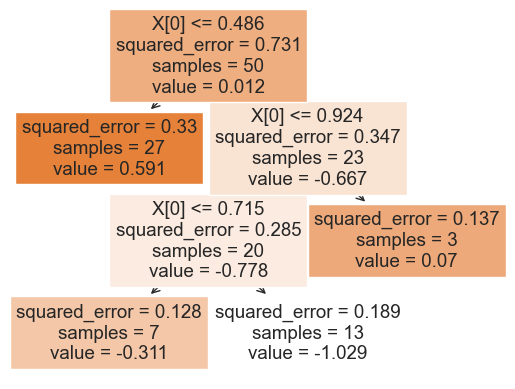

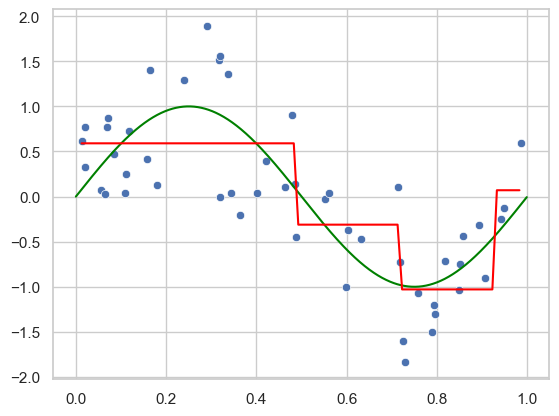

In [209]:
reg = DecisionTreeRegressor(max_leaf_nodes=4)
reg.fit(X, y)

plot_tree(reg, filled=True);
plot2();

#### Test different leaf numbers

In [222]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return(mae)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

scores = {leaf_size: get_mae(leaf_size, X_train, X_test, y_train, y_test) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)

print(scores)
print(best_tree_size)

{5: 0.5219333669128257, 25: 0.4902576665490568, 50: 0.5088700479865886, 100: 0.5088700479865886, 250: 0.5088700479865886, 500: 0.5088700479865886}
25


#### Retrain on full dataset using optimal #leaves

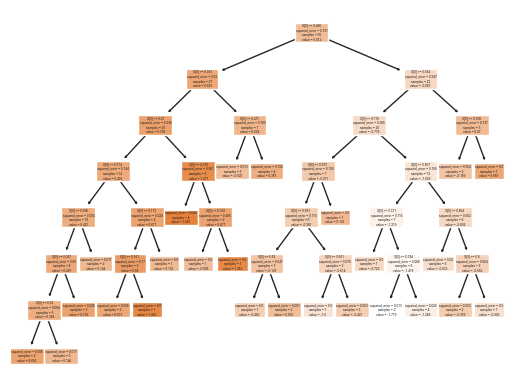

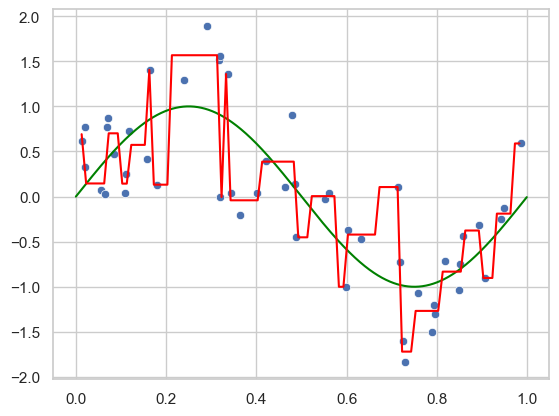

In [223]:
reg = DecisionTreeRegressor(max_leaf_nodes=25)
reg.fit(X, y)

plot_tree(reg, filled=True);
plot2();

## Bagging & Random Forest (Ensamble Methods: Averaging)

In [113]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

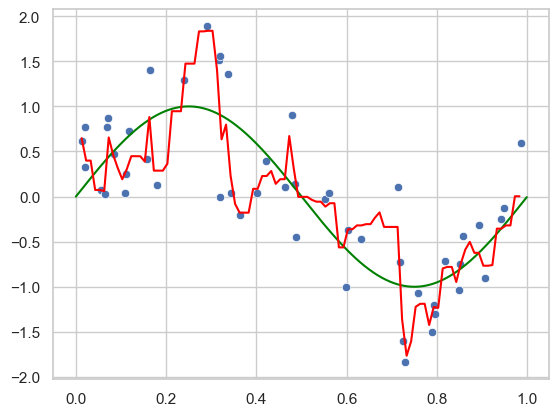

In [182]:
reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0)
reg.fit(X, y.reshape(-1,))

plot2()

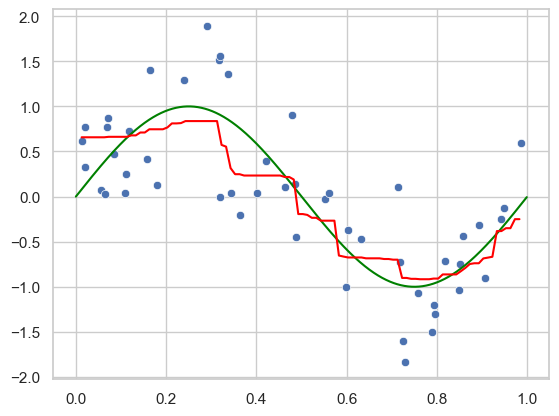

In [183]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X, y.reshape(-1,))

plot2()

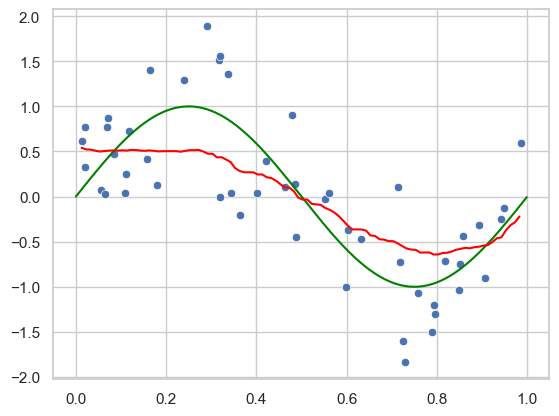

In [186]:
reg = ExtraTreesRegressor(max_depth=2, random_state=0)
reg.fit(X, y.reshape(-1,))

plot2()

## AdaBoost & Gradient Tree Boosting (Ensamble Methods: Boosting)

In [184]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor



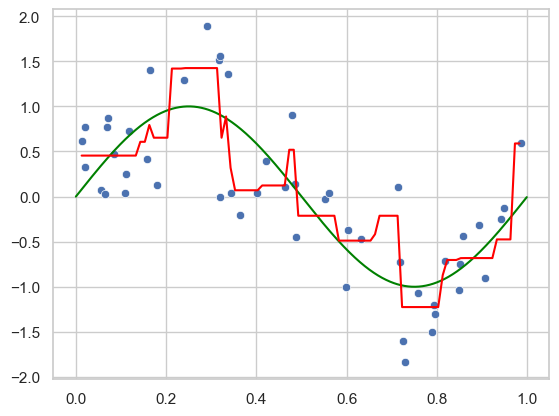

In [187]:
reg = AdaBoostRegressor(random_state=0, n_estimators=100)
reg.fit(X, y.reshape(-1,))
plot2()

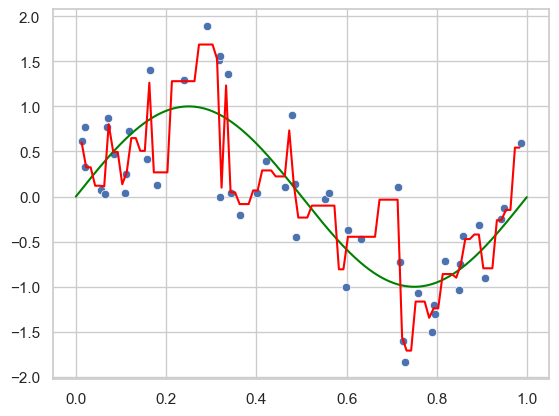

In [188]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X, y.reshape(-1,))
plot2()

# Clustering

| Model                   |Type             | Speed | Dataset size    | Assumptions         | Notes
| :-                      | :-              | :-    | :-              | :-                  | :-     
| k-means                 | Nonhierarchical |       | <10k            |                     |
| k-means (MiniBatch)     | Nonhierarchical |       | >10k            |                     |
| k-mode                  | Nonhierarchical |       |                 |                     | For categorical data
| Gaussian Mixture Model  | Nonhierarchical |       |                 |                     | 

## KMeans

# Dimensionality Reduction

| Model                   |Type            | Speed | Dataset size    | Assumptions         | Notes
| :-                      | :-             | :-    | :-              | :-                  | :-     
| PCA                     |                |       |                 |                     |
| LDA                     | Generative     |       |                 |                     |

## PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
X = iris_np.data

In [23]:
K = 4
pca = PCA(n_components=K)
pca.fit(X)

PCA(n_components=4)

Principal components:
         PC1       PC2       PC3       PC4
0  0.361387  0.656589 -0.582030 -0.315487
1 -0.084523  0.730161  0.597911  0.319723
2  0.856671 -0.173373  0.076236  0.479839
3  0.358289 -0.075481  0.545831 -0.753657

 Eigenvalues/variance of the projections:
 [4.22824171 0.24267075 0.0782095  0.02383509]

Proportion of variance explained:
  [0.92461872 0.05306648 0.01710261 0.00521218]


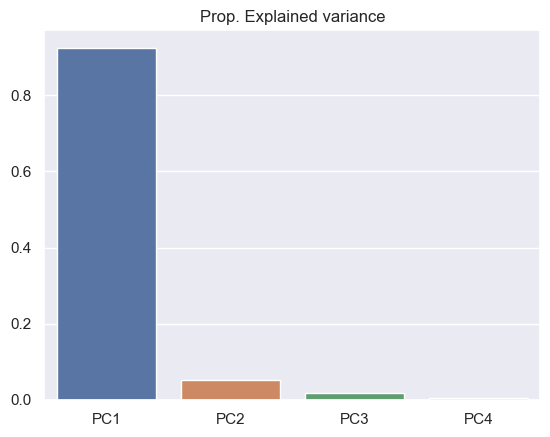

In [32]:
V = pd.DataFrame(
    data=pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4"]
)  # Principal components
print("Principal components:\n", V)

lam = pca.explained_variance_  # eigenvalues
print("\n Eigenvalues/variance of the projections:\n", lam)

# Proportion of variance explained
Normalised_lam = pca.explained_variance_ratio_
print("\nProportion of variance explained:\n ", Normalised_lam)

# plt.figure()
sns.barplot(x=["PC1", "PC2", "PC3", "PC4"], y=Normalised_lam).set(
    title="Prop. Explained variance"
)
plt.show()

In [42]:
# PCA dataframe
Z_pca = pca.transform(X)  # Projections on the PCs

crabs2 = pd.concat(
    [pd.DataFrame(Z_pca, columns=["PC1", "PC2", "PC3", "PC4"]), pd.DataFrame(y)], axis=1
)
crabs2

df = crabs2[["PC2", "PC3", 0]]
df.head()

PC2       PC3  0
0  0.319397 -0.027915  0
1 -0.177001 -0.210464  0
2 -0.144949  0.017900  0
3 -0.318299  0.031559  0
4  0.326755  0.090079  0

In [93]:
df

PC2       PC3  0
0    0.319397 -0.027915  0
1   -0.177001 -0.210464  0
2   -0.144949  0.017900  0
3   -0.318299  0.031559  0
4    0.326755  0.090079  0
..        ...       ... ..
145  0.187532  0.177825  2
146 -0.375317 -0.121898  2
147  0.078859  0.130482  2
148  0.116628  0.723252  2
149 -0.282661  0.362910  2

[150 rows x 3 columns]

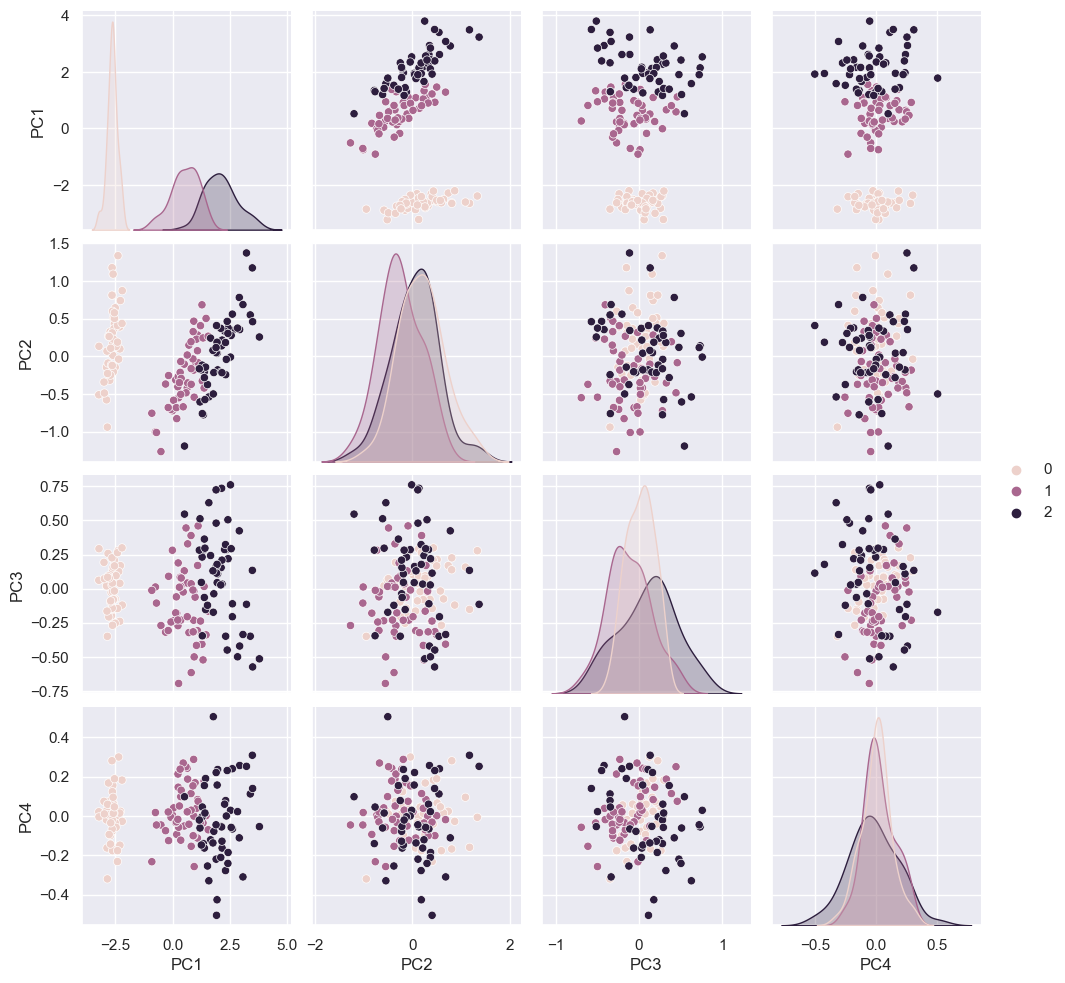

In [95]:
sns.pairplot(data=crabs2, hue=0);

In [58]:
X = np.array(df[["PC2", "PC3"]])
y = iris_np.target

In [59]:
%%time
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

CPU times: total: 0 ns
Wall time: 1 ms


QuadraticDiscriminantAnalysis()

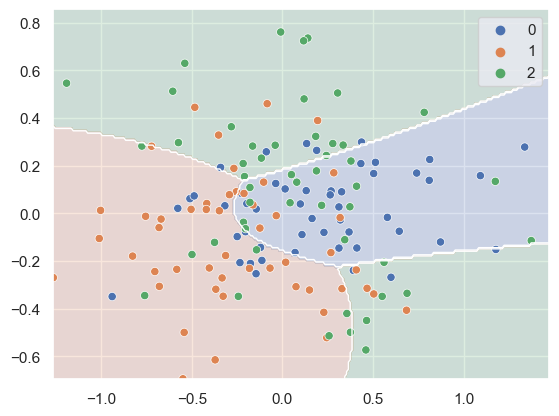

In [61]:
create_mesh(
    (X[:, 0].min(), X[:, 0].max() + 0.1),
    (X[:, 1].min(), X[:, 1].max() + 0.1),
    delta=0.01,
)
decision_predict_mesh(qda)
plot_decision_contours(3)

col = sns.color_palette()  # use sns standard color palette
g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="deep")

## LDA